In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from statistics import median, StatisticsError

In [2]:
table = pd.read_excel('03.23.xlsx')

# Общая оценка

Размеры датасета

In [3]:
table.head()

,№,Переход_по_ссылке,Ввод_данных,Сообщение_в_ЦПКБ,Должность,Подразделение_2,Подразделение_3,Подразделение_4
0,1,есть,есть,нет,Ведущий инженер по сопровождению,ПАО Сбербанк (ЦА),"Блок ""Технологии""",1.0
1,2,нет,нет,да,Руководитель направления,ПАО Сбербанк (ЦА),"Блок ""Технологии""",1.0
2,3,нет,нет,нет,Руководитель направления,ПАО Сбербанк (ЦА),"Блок ""Риски""",2.0
3,4,нет,нет,нет,Исполнительный директор,ПАО Сбербанк (ЦА),"Блок ""Технологии""",3.0
4,5,нет,нет,нет,Исполнительный директор,ПАО Сбербанк (ЦА),"Блок ""Технологии""",4.0


In [4]:
print(table.shape)
print(len(table))

(45666, 8)
45666


Уникальные значения в столбцах

In [5]:
table['Сообщение_в_ЦПКБ'] = table['Сообщение_в_ЦПКБ'].fillna('нет')
table.head()

,№,Переход_по_ссылке,Ввод_данных,Сообщение_в_ЦПКБ,Должность,Подразделение_2,Подразделение_3,Подразделение_4
0,1,есть,есть,нет,Ведущий инженер по сопровождению,ПАО Сбербанк (ЦА),"Блок ""Технологии""",1.0
1,2,нет,нет,да,Руководитель направления,ПАО Сбербанк (ЦА),"Блок ""Технологии""",1.0
2,3,нет,нет,нет,Руководитель направления,ПАО Сбербанк (ЦА),"Блок ""Риски""",2.0
3,4,нет,нет,нет,Исполнительный директор,ПАО Сбербанк (ЦА),"Блок ""Технологии""",3.0
4,5,нет,нет,нет,Исполнительный директор,ПАО Сбербанк (ЦА),"Блок ""Технологии""",4.0


In [6]:
table['Переход_по_ссылке'].unique()

array(['есть', 'нет'], dtype=object)

In [7]:
table['Ввод_данных'].unique()

array(['есть', 'нет'], dtype=object)

In [8]:
table['Сообщение_в_ЦПКБ'].unique()

array(['нет', 'да'], dtype=object)

Заменяем длинные сообщения на численные эквиваленты

In [9]:
def change_data(msg: str) -> str:
    return 1 if msg.split()[0] in ['есть', 'да'] else 0

In [10]:
table['Ввод_данных'] = table['Ввод_данных'].map(change_data)
table.head()

,№,Переход_по_ссылке,Ввод_данных,Сообщение_в_ЦПКБ,Должность,Подразделение_2,Подразделение_3,Подразделение_4
0,1,есть,1,нет,Ведущий инженер по сопровождению,ПАО Сбербанк (ЦА),"Блок ""Технологии""",1.0
1,2,нет,0,да,Руководитель направления,ПАО Сбербанк (ЦА),"Блок ""Технологии""",1.0
2,3,нет,0,нет,Руководитель направления,ПАО Сбербанк (ЦА),"Блок ""Риски""",2.0
3,4,нет,0,нет,Исполнительный директор,ПАО Сбербанк (ЦА),"Блок ""Технологии""",3.0
4,5,нет,0,нет,Исполнительный директор,ПАО Сбербанк (ЦА),"Блок ""Технологии""",4.0


Проверяем результат

In [11]:
table['Ввод_данных'].unique()

array([1, 0], dtype=int64)

In [12]:
table['Переход_по_ссылке'] = table['Переход_по_ссылке'].map(change_data)
table['Сообщение_в_ЦПКБ'] = table['Сообщение_в_ЦПКБ'].map(change_data)

Корректируем названия блоков, убираем лишнии символы

In [13]:
def change_dep(dep: str) -> str:
    dep_temp = dep.split()
    return dep_temp[0] + " " + dep_temp[1].strip("\"")

In [14]:
table['Подразделение_3'] = table['Подразделение_3'].map(change_dep)

In [15]:
table.head()

,№,Переход_по_ссылке,Ввод_данных,Сообщение_в_ЦПКБ,Должность,Подразделение_2,Подразделение_3,Подразделение_4
0,1,1,1,0,Ведущий инженер по сопровождению,ПАО Сбербанк (ЦА),Блок Технологии,1.0
1,2,0,0,1,Руководитель направления,ПАО Сбербанк (ЦА),Блок Технологии,1.0
2,3,0,0,0,Руководитель направления,ПАО Сбербанк (ЦА),Блок Риски,2.0
3,4,0,0,0,Исполнительный директор,ПАО Сбербанк (ЦА),Блок Технологии,3.0
4,5,0,0,0,Исполнительный директор,ПАО Сбербанк (ЦА),Блок Технологии,4.0


Подсчет сотрудников

In [16]:
table.value_counts('Должность')

Должность
Руководитель направления                                  9045
Главный инженер по разработке                             6537
Ведущий инженер по разработке                             3287
Эксперт                                                   3028
Менеджер                                                  2468
                                                          ... 
Руководитель направления поддержки внутренних сервисов       1
Руководитель направления процессов                           1
Руководитель направления стандартизации                      1
Директор по операционному маркетингу                         1
Младший сейлз-региональный менеджер                          1
Length: 383, dtype: int64

In [17]:
len(table.value_counts('Должность'))

383

Подсчет блоков

In [18]:
table.value_counts('Подразделение_3')

Подразделение_3
Блок Технологии                     29731
Блок Корпоративно-инвестиционный     3815
Подразделения вне                    2405
Блок Сервисы                         2112
Блок Управление                      1008
Блок HR                               976
Блок Финансы                          920
Блок Риски                            852
Блок Сеть                             754
Прямое подчинение                     679
Блок GR,                              645
Блок Развитие                         571
Блок Транзакционный                   551
Блок Розничный                        426
Блок Стратегия                        142
Блок Sberbank                          58
Другие подразделения                   21
dtype: int64

In [19]:
len(table.value_counts('Подразделение_3'))

17

# Рассмотрение всех исходов

Класс для того, чтобы сохранить описание каждого конкретного варианта. Можно расширить и добавить дополнительные критерии для оценки. Worker_rate - топ сотрудников, deaprtment_rate - топ блоков, percentw_rate и percentd_rate - топы переведенные в проценты

In [20]:
class EndDescribe:
    def __init__(self):
        self.num = 0
        self.table_len = 0
        self.worker_rate = []
        self.department_rate = []
        self.percentw_rate = []
        self.percentd_rate = []
        
    def get_percent(self, rate_list: dict) -> dict:
        cur_len = sum(rate_list.values())
        percent_val = list(map(lambda item: float("{0:.3f}".format((item / cur_len) * 100)), rate_list.values()))
        return {key: val for key, val in zip(rate_list.keys(), percent_val)}
        
        

Функция проверки и заполнения каждого из возможных исходов. При расширении класса, необходимо добавить сюда вычисления добавленных характеристик. Возвращает объект типа EndDescribe для полученного на вход исхода

In [21]:
def check_end(cur_end: tuple) -> EndDescribe:
    cur_table = table.query(f'Переход_по_ссылке == {cur_end[0]} & Ввод_данных == {cur_end[1]} & Сообщение_в_ЦПКБ == {cur_end[2]}')
    cur_dscrb = EndDescribe()
    cur_dscrb.table_len = len(cur_table)
    cur_dscrb.worker_rate = cur_table.value_counts('Должность')
    cur_dscrb.department_rate = cur_table.value_counts('Подразделение_3')
    cur_dscrb.percentw_rate = cur_dscrb.get_percent(dict(cur_dscrb.worker_rate.items()))
    cur_dscrb.percentd_rate = cur_dscrb.get_percent(dict(cur_dscrb.department_rate.items()))
    
    return cur_dscrb

Множество всех исходов, 1 - есть 0 - нет. Каждый вектор обозначает один из возможных исходов. То есть, например, вектор (0, 0, 0) - обозначает полное игнорирование письма, а вектор (1, 0, 0) - означает только переход по ссылке. 

In [22]:
codes = [(0, 0, 0), (0, 0, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]

Список объектов с описаниями всех возможных исходов

In [23]:
possible_ends = {code: check_end(code) for code in codes}

Общее распределение всех исходов

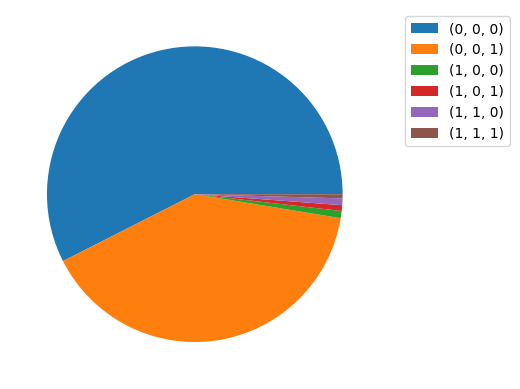

In [24]:
gen_len = len(table)

plt.pie([(end.table_len / gen_len) * 100 for end in possible_ends.values()])

plt.legend(codes, bbox_to_anchor=( 1.05 , 1 ), loc='upper left')
plt.show()

Топ 10 сотрудников по численности

In [25]:
top_workers = table.value_counts('Должность')[:10]
top_workers

Должность
Руководитель направления            9045
Главный инженер по разработке       6537
Ведущий инженер по разработке       3287
Эксперт                             3028
Менеджер                            2468
Исполнительный директор             2430
Старший инженер по разработке       1819
Руководитель проектов               1177
Ведущий инженер по сопровождению    1038
Ведущий инженер                      966
dtype: int64

Топ 10 популярных должностей - 70% от общего количества

In [26]:
float("{0:.3f}".format((sum(top_workers.values)/sum(table.value_counts('Должность'))) * 100))

69.625

Топ 10 должностей в каждом варианте

In [27]:
worker_rate = {key: val.worker_rate[:10] for key, val in possible_ends.items()}
for key, val in worker_rate.items():
    print(f"{key}: \n{val}")
    print("\n")

(0, 0, 0): 
Должность
Руководитель направления            4797
Главный инженер по разработке       3181
Эксперт                             2133
Ведущий инженер по разработке       1658
Менеджер                            1538
Исполнительный директор             1425
Старший инженер по разработке        872
Руководитель проектов                709
Ведущий инженер по сопровождению     665
Ведущий инженер                      621
dtype: int64


(0, 0, 1): 
Должность
Руководитель направления            4030
Главный инженер по разработке       3199
Ведущий инженер по разработке       1564
Исполнительный директор              933
Старший инженер по разработке        904
Менеджер                             870
Эксперт                              807
Руководитель проектов                442
Ведущий инженер по сопровождению     354
Аналитик                             333
dtype: int64


(1, 0, 0): 
Должность
Руководитель направления         66
Главный инженер по разработке    36
Эксперт     

Распределение по исходам для топ 10 должностей на графиках

Руководитель направления


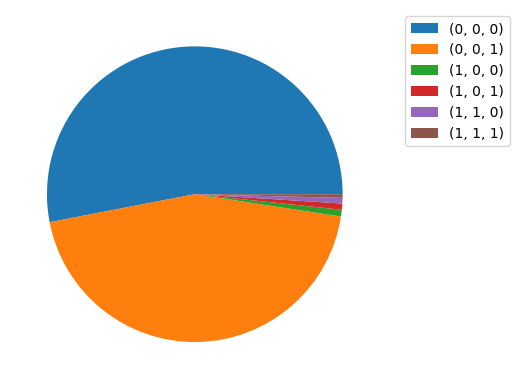

Главный инженер по разработке


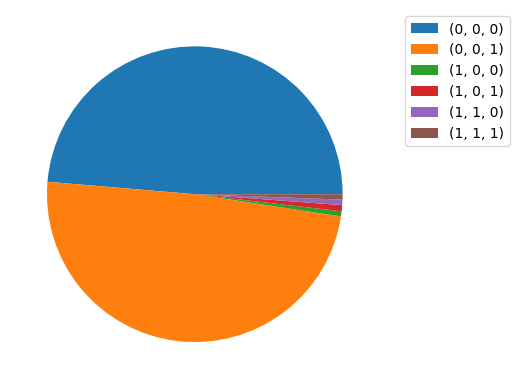

Ведущий инженер по разработке


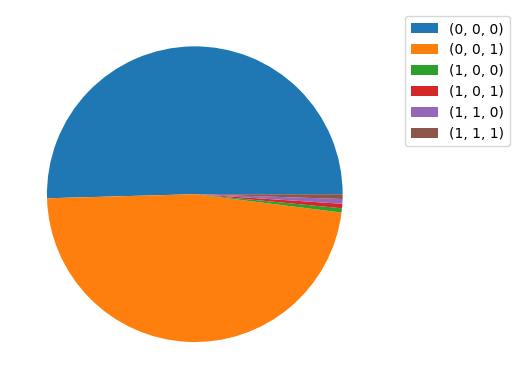

Эксперт


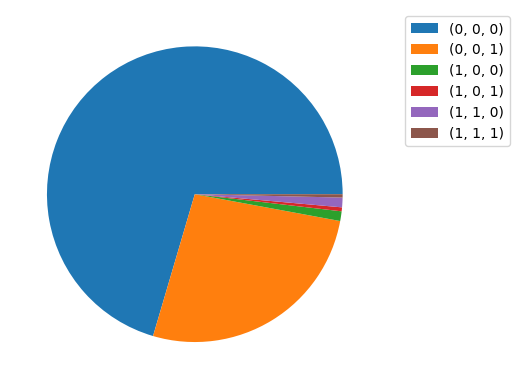

Менеджер


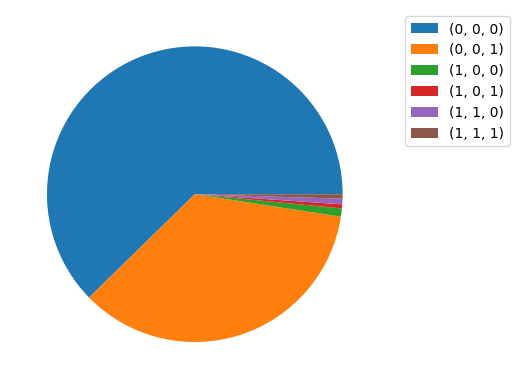

Исполнительный директор


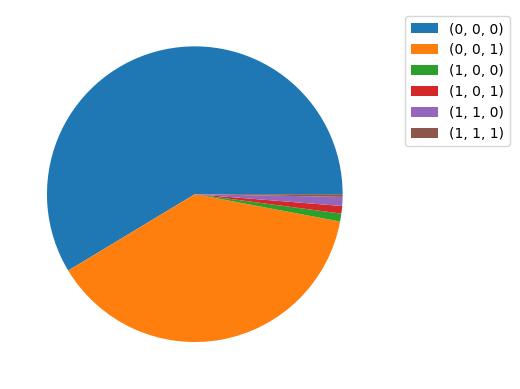

Старший инженер по разработке


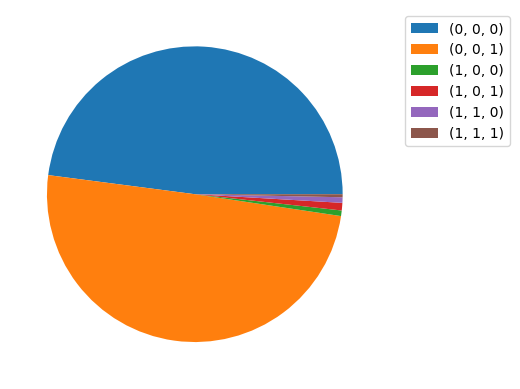

Руководитель проектов


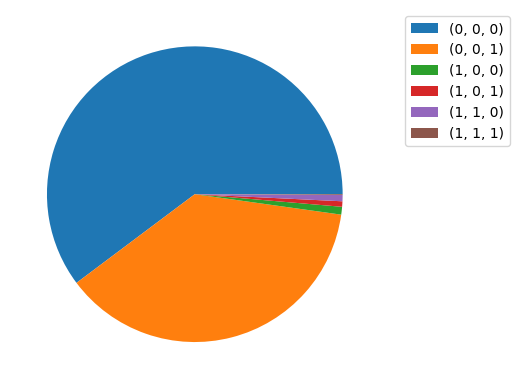

Ведущий инженер по сопровождению


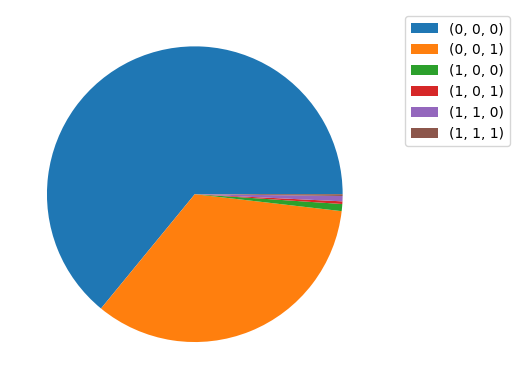

Ведущий инженер


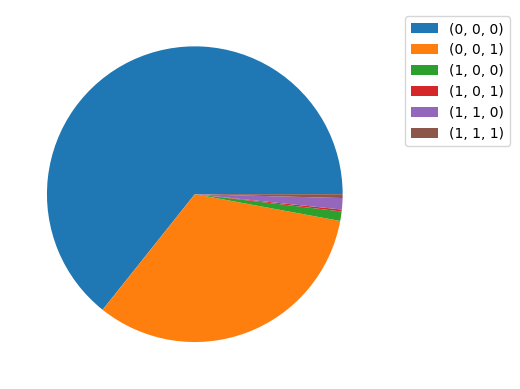

In [28]:
for worker in dict(top_workers).keys():
    print(worker)
    data_list = []
    for end in possible_ends.values():
        try:
            data_list.append(dict(end.worker_rate)[worker])
        except KeyError:
            pass
    plt.pie(data_list)
    plt.legend(codes, bbox_to_anchor=( 1.05 , 1 ), loc='upper left')
    plt.show()

Топ 10 блоков по численности

In [29]:
top_departments = table.value_counts('Подразделение_3')[:10]
top_departments

Подразделение_3
Блок Технологии                     29731
Блок Корпоративно-инвестиционный     3815
Подразделения вне                    2405
Блок Сервисы                         2112
Блок Управление                      1008
Блок HR                               976
Блок Финансы                          920
Блок Риски                            852
Блок Сеть                             754
Прямое подчинение                     679
dtype: int64

Топ 10 блоков в каждом варианте

In [30]:
department_rate = {key: val.department_rate[:10] for key, val in possible_ends.items()}
for key, val in department_rate.items():
    print(f"{key}: \n{val}")
    print("\n")

(0, 0, 0): 
Подразделение_3
Блок Технологии                     16022
Блок Корпоративно-инвестиционный     2559
Подразделения вне                    1704
Блок Сервисы                         1163
Блок Управление                       800
Блок HR                               571
Блок Финансы                          501
Блок Сеть                             490
Прямое подчинение                     488
Блок GR,                              474
dtype: int64


(0, 0, 1): 
Подразделение_3
Блок Технологии                     13000
Блок Корпоративно-инвестиционный     1126
Блок Сервисы                          900
Подразделения вне                     644
Блок Риски                            453
Блок Финансы                          402
Блок HR                               351
Блок Сеть                             237
Блок Транзакционный                   232
Блок Управление                       187
dtype: int64


(1, 0, 0): 
Подразделение_3
Блок Технологии                     198
Блок К

Распределение исходов для топ 10 блоков на графиках

Блок Технологии


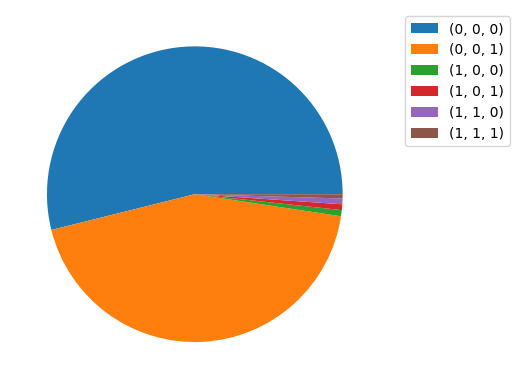

Блок Корпоративно-инвестиционный


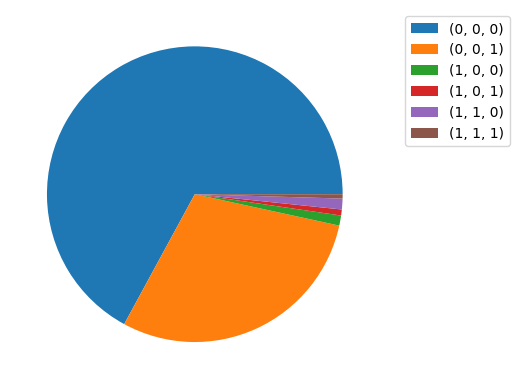

Подразделения вне


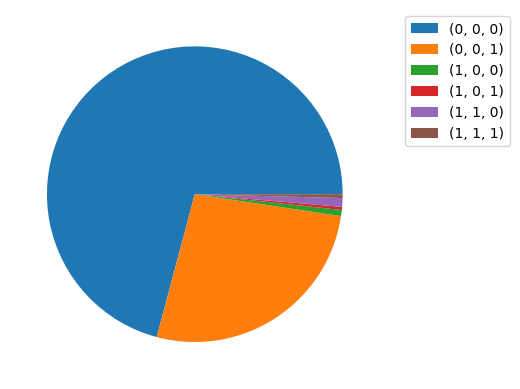

Блок Сервисы


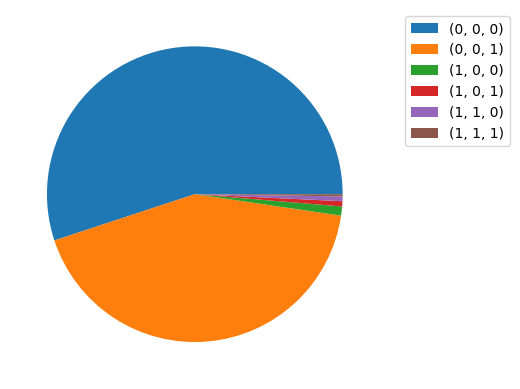

Блок Управление


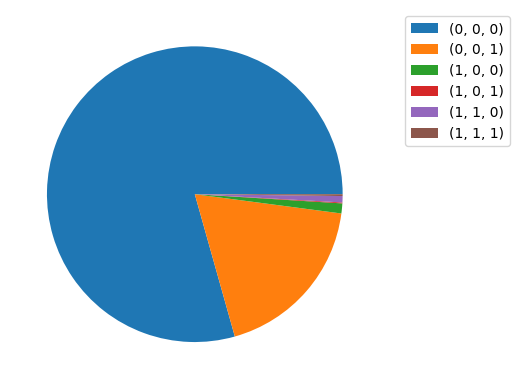

Блок HR


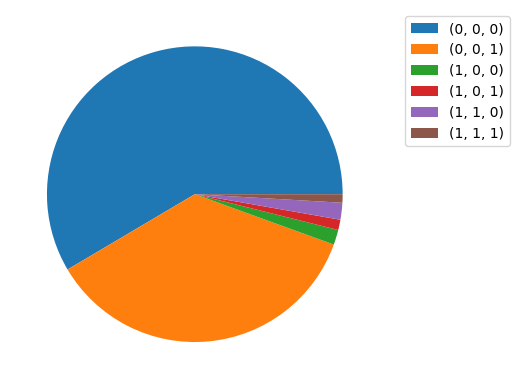

Блок Финансы


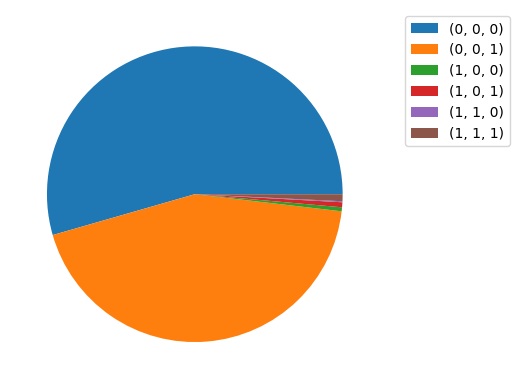

Блок Риски


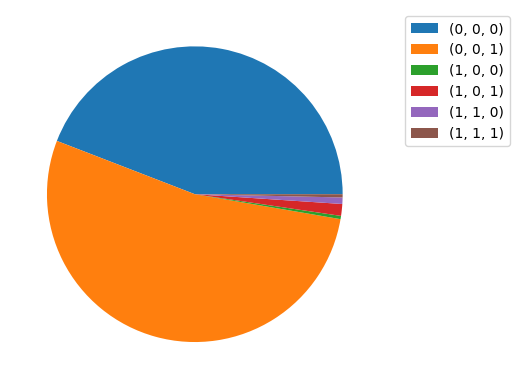

Блок Сеть


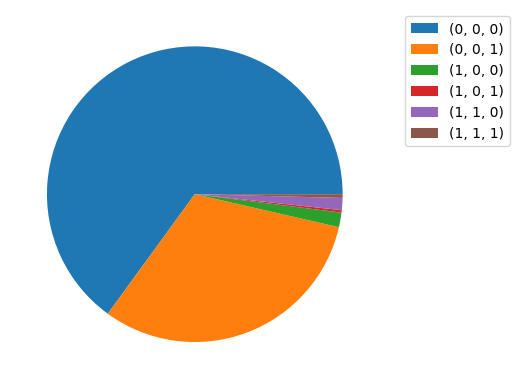

Прямое подчинение


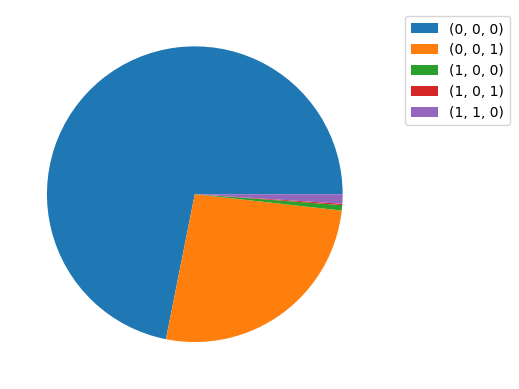

In [31]:
for department in dict(top_departments).keys():
    print(department)
    data_list = []
    for end in possible_ends.values():
        try:
            data_list.append(dict(end.department_rate)[department])
        except KeyError:
            pass
    plt.pie(data_list)
    plt.legend(codes, bbox_to_anchor=( 1.05 , 1 ), loc='upper left')
    plt.show()

Сравненеи размера каждого исхода с общим размером

In [32]:
fit_workers = [(end.table_len / len(table)) * 100 for end in possible_ends.values()]

In [33]:
other_workers = [100 - (end.table_len / len(table)) * 100 for end in possible_ends.values()]

In [34]:
indexes = [str(key) for key in possible_ends.keys()]
results = {"end": indexes, "Fit": fit_workers, "Other": other_workers}

df = pd.DataFrame(results, index=indexes)

In [35]:
df

,end,Fit,Other
"(0, 0, 0)","(0, 0, 0)",57.476022,42.523978
"(0, 0, 1)","(0, 0, 1)",39.929050,60.070950
"(1, 0, 0)","(1, 0, 0)",0.781763,99.218237
"(1, 0, 1)","(1, 0, 1)",0.626287,99.373713
"(1, 1, 0)","(1, 1, 0)",0.735777,99.264223
"(1, 1, 1)","(1, 1, 1)",0.451101,99.548899


Соотношение объема каждого исхода к общему объему на графике

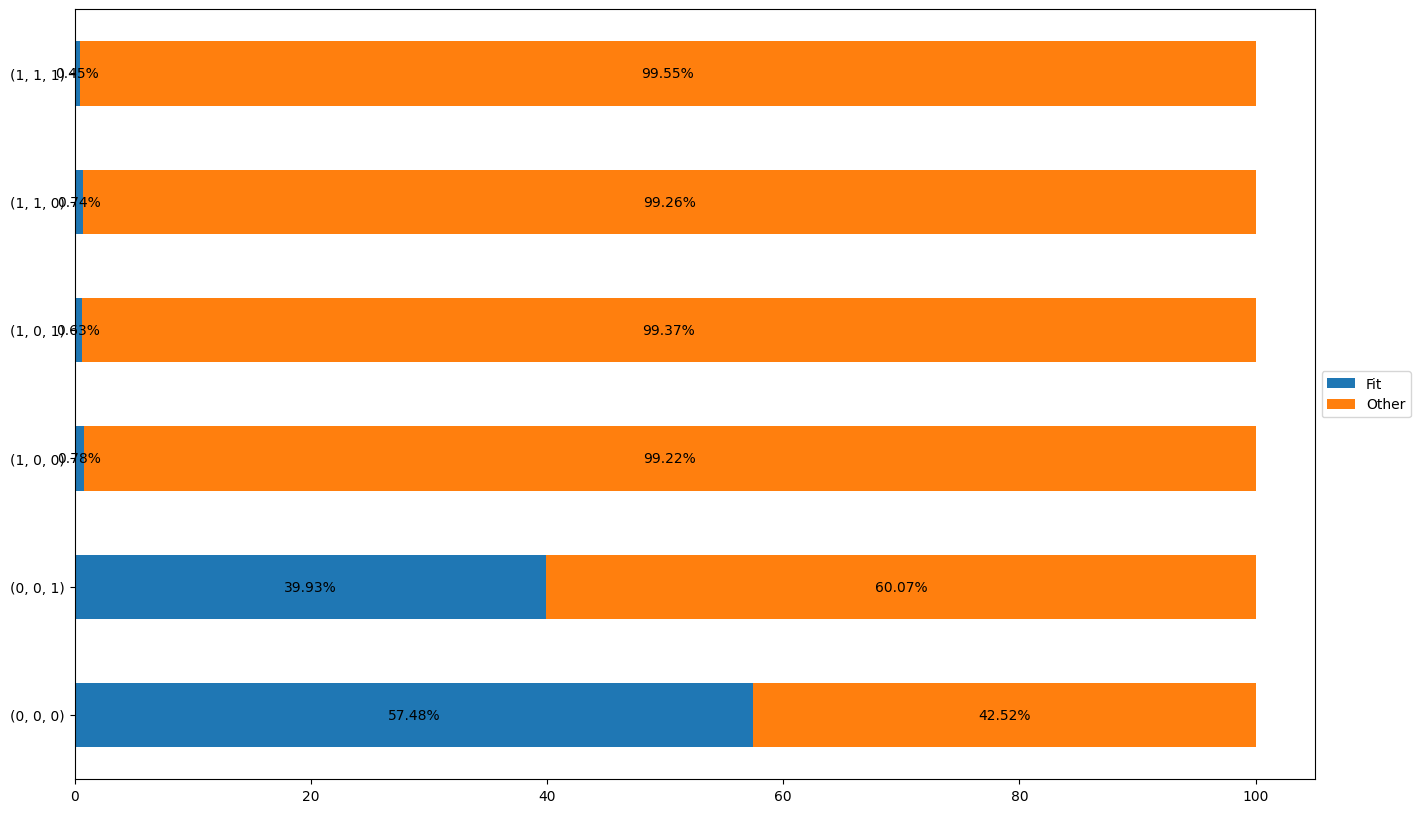

In [36]:
ax = df.plot.barh(stacked=True, figsize=(16, 10))

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width > 0:
         ax.annotate(f'{width:0.2f}%', xy=(left+width/2, bottom+height/2), ha='center', va='center')

Создание таблиц для более удобной обработки исходов

Таблица для топ 10 по популярности должностей

In [37]:
table['Исход'] = list(zip(table['Переход_по_ссылке'], table['Ввод_данных'], table['Сообщение_в_ЦПКБ']))
temp_table = table.drop(columns=['№', 'Переход_по_ссылке', 'Ввод_данных', 'Сообщение_в_ЦПКБ', 'Подразделение_4', 'Подразделение_2'])
top_work = list(dict(top_workers).keys())
temp_table = temp_table.loc[temp_table['Должность'].isin(top_work)]

Полная таблица для всех должностей

In [38]:
table['Исход'] = list(zip(table['Переход_по_ссылке'], table['Ввод_данных'], table['Сообщение_в_ЦПКБ']))
full_temp_table = table.drop(columns=['№', 'Переход_по_ссылке', 'Ввод_данных', 'Сообщение_в_ЦПКБ', 'Подразделение_4', 'Подразделение_2'])
top_work = table['Должность'].unique()
full_temp_table = full_temp_table.loc[full_temp_table['Должность'].isin(top_work)]

In [39]:
full_temp_table

,Должность,Подразделение_3,Исход
0,Ведущий инженер по сопровождению,Блок Технологии,"(1, 1, 0)"
1,Руководитель направления,Блок Технологии,"(0, 0, 1)"
2,Руководитель направления,Блок Риски,"(0, 0, 0)"
3,Исполнительный директор,Блок Технологии,"(0, 0, 0)"
4,Исполнительный директор,Блок Технологии,"(0, 0, 0)"
...,...,...,...
45661,Аналитик,Блок Сервисы,"(1, 1, 0)"
45662,Ведущий эксперт по исследованию данных,Блок Корпоративно-инвестиционный,"(0, 0, 0)"
45663,Главный аналитик,Блок Корпоративно-инвестиционный,"(0, 0, 0)"
45664,Аналитик,Подразделения вне,"(0, 0, 0)"


In [40]:
full_temp_table['Исход'] = full_temp_table['Исход'].map(lambda cell: str(cell))

Распределение по исходам для топ 10 по популярности должностей в каждом отделе

Зададим условный код для каждого исхода, для более удобного представления на графиках. Соответствия кодов и исходов в словаре ниже:

In [41]:
def change_index(index: str) -> str:
    return {'(0, 0, 0)': 'I',
            '(1, 0, 0)': 'B1',
            '(1, 1, 0)': 'B2',
            '(1, 1, 1)': 'B3',
            '(0, 0, 1)': 'G',
            '(1, 0, 1)': 'B4'}[index]

In [42]:
def department_stat(department: str) -> None:
    print(department)
    department_temp = department.split()
    cur_table = full_temp_table.query(f'Подразделение_3 == "{department}"')
    cur_col = cur_table.value_counts('Должность')[:10]
    fig, axs = plt.subplots(2, 5, figsize=(17, 7))
    cur_row = 0
    for ind, worker in enumerate(cur_col.keys()):
        cur_worker_table = cur_table.query(f'Должность == "{worker}"')
        indexes = list(map(change_index, list(cur_worker_table.value_counts('Исход').keys())))
        if ind > 4:
            cur_row = 1
            axs[cur_row, ind - 5].bar(indexes, cur_worker_table.value_counts('Исход').values)
            axs[cur_row, ind - 5].set_title(worker, fontsize=9)
            continue
        axs[cur_row, ind].bar(indexes, cur_worker_table.value_counts('Исход').values)
        axs[cur_row, ind].set_title(worker, fontsize=9)
    plt.show()

Блок Технологии


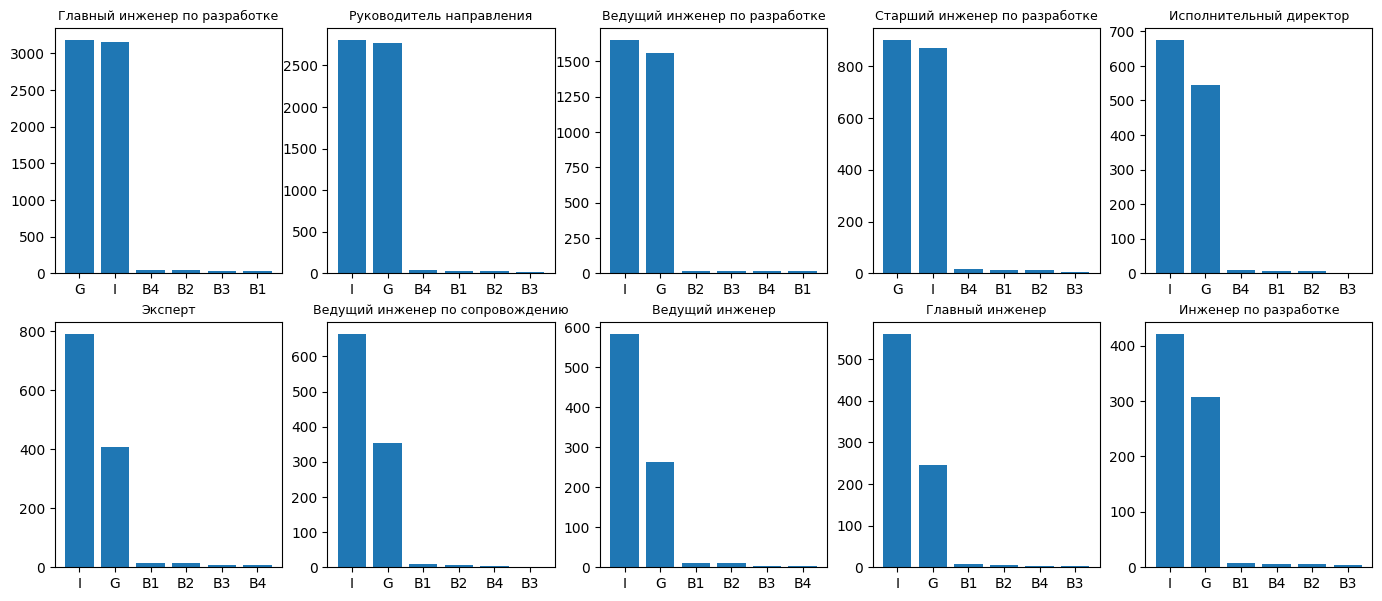

Блок Риски


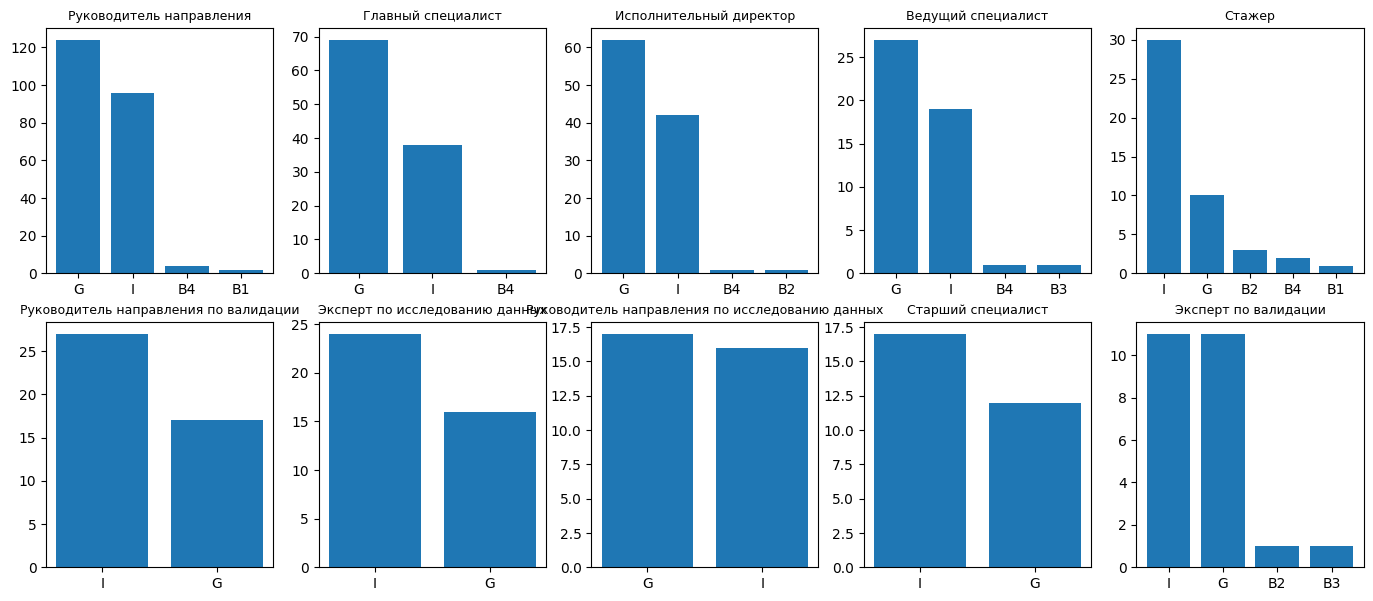

Прямое подчинение


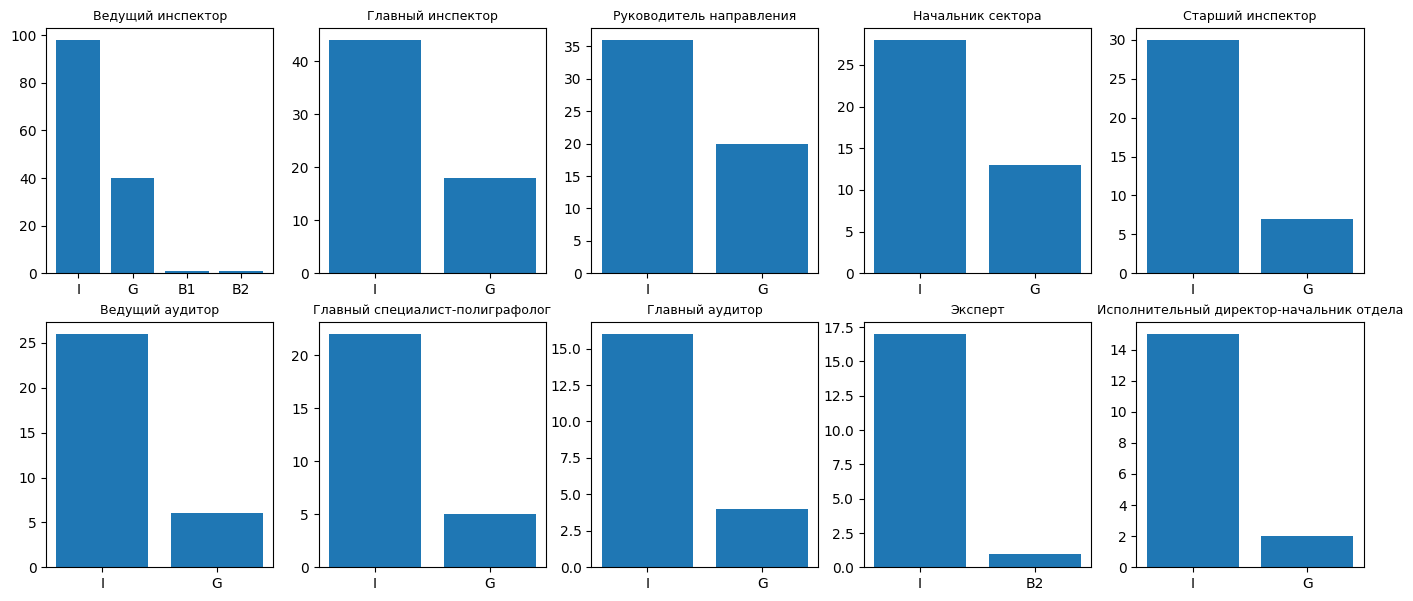

Блок HR


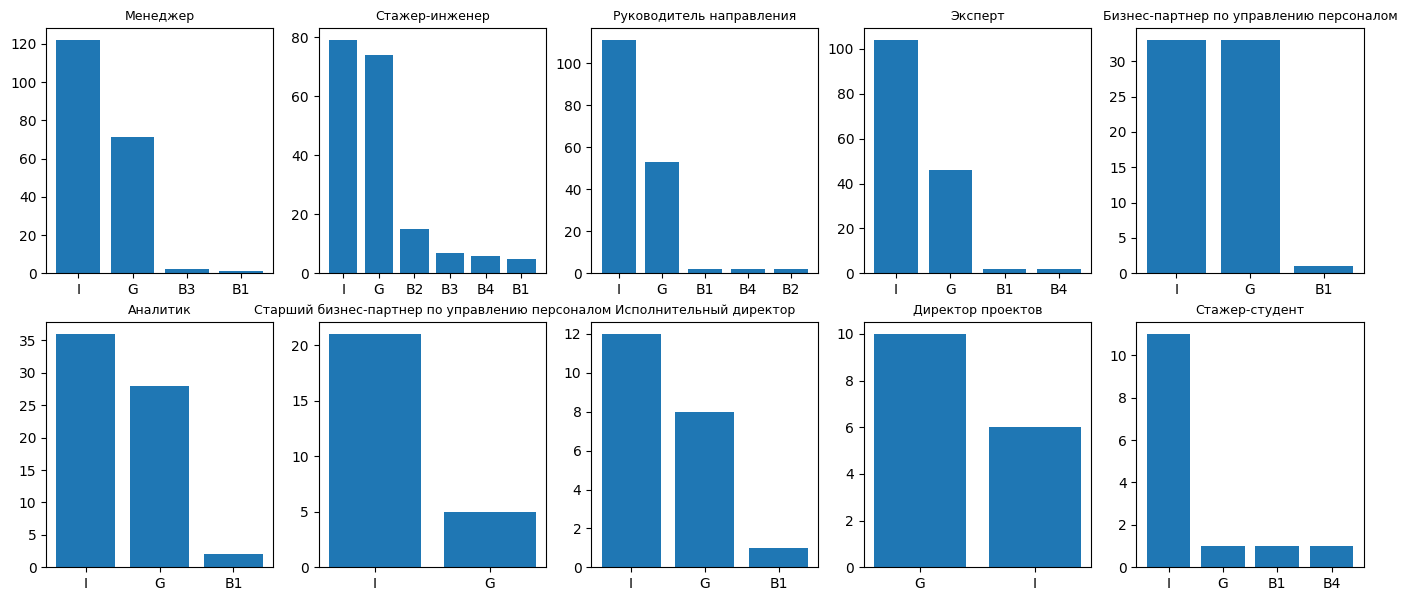

Блок Корпоративно-инвестиционный


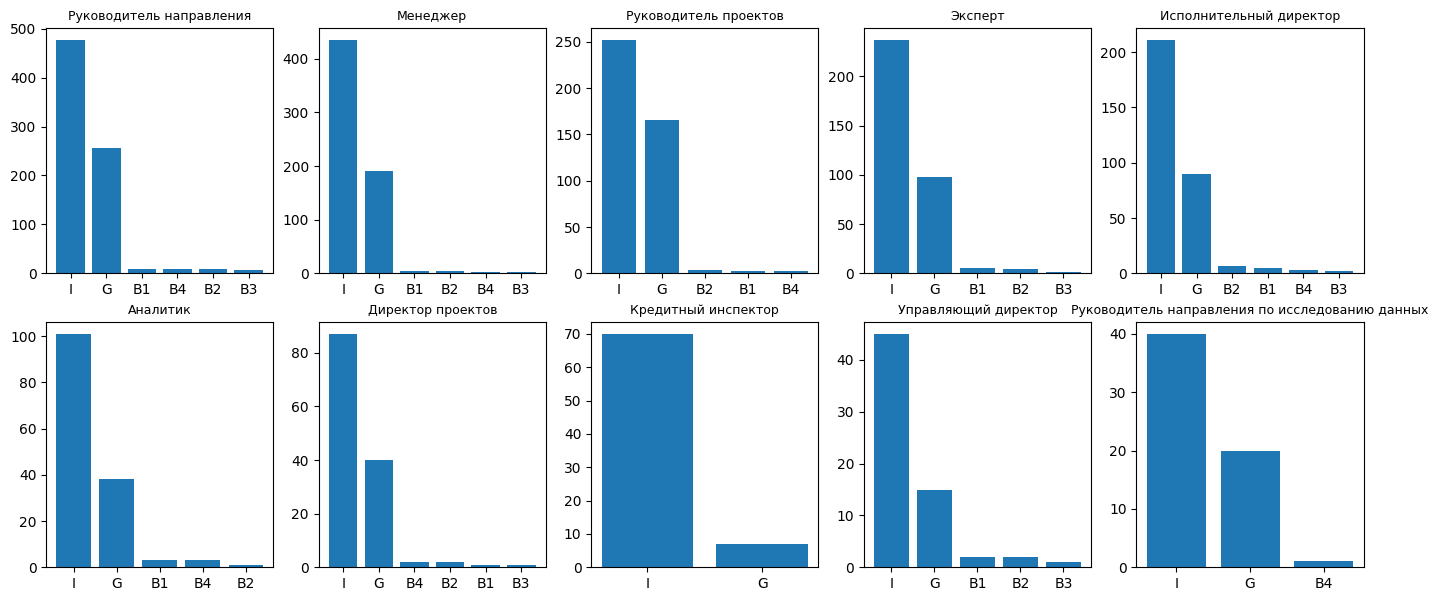

Подразделения вне


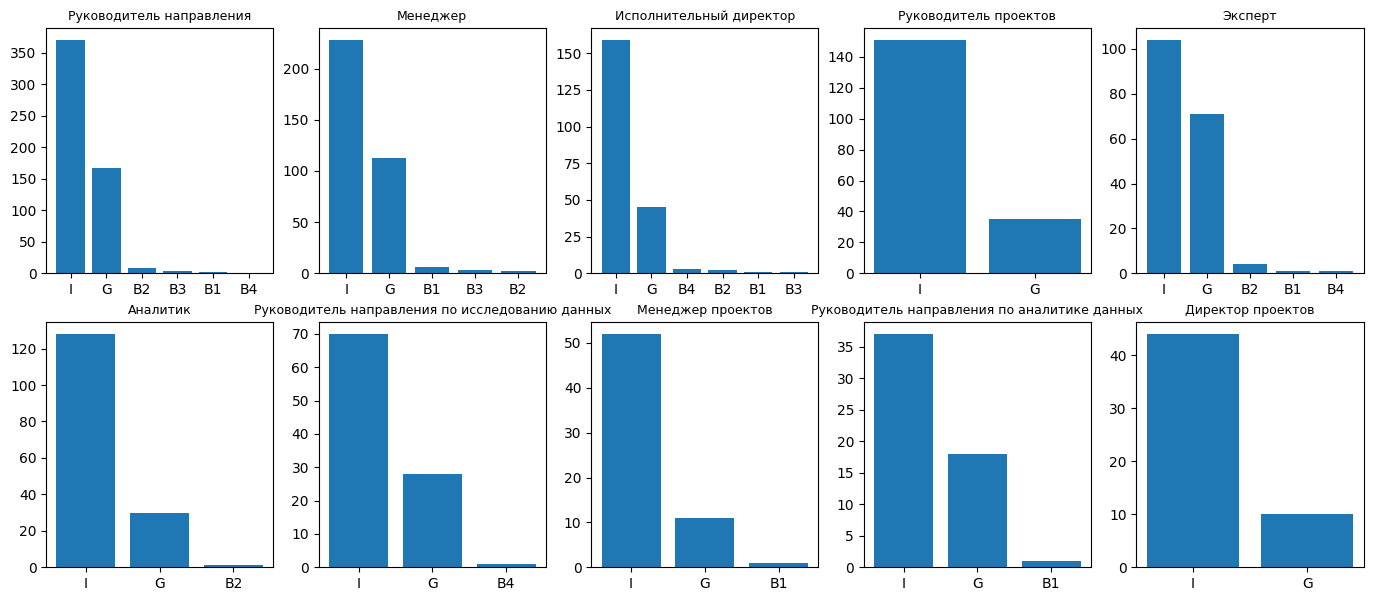

Блок Сервисы


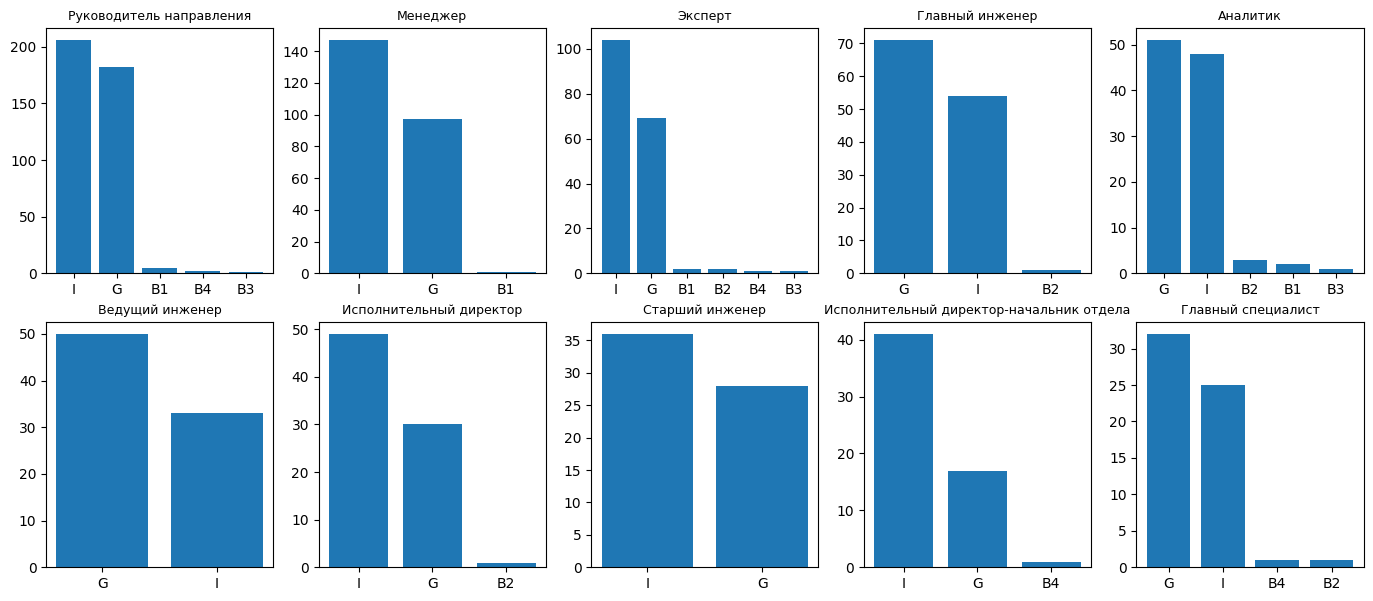

Блок GR,


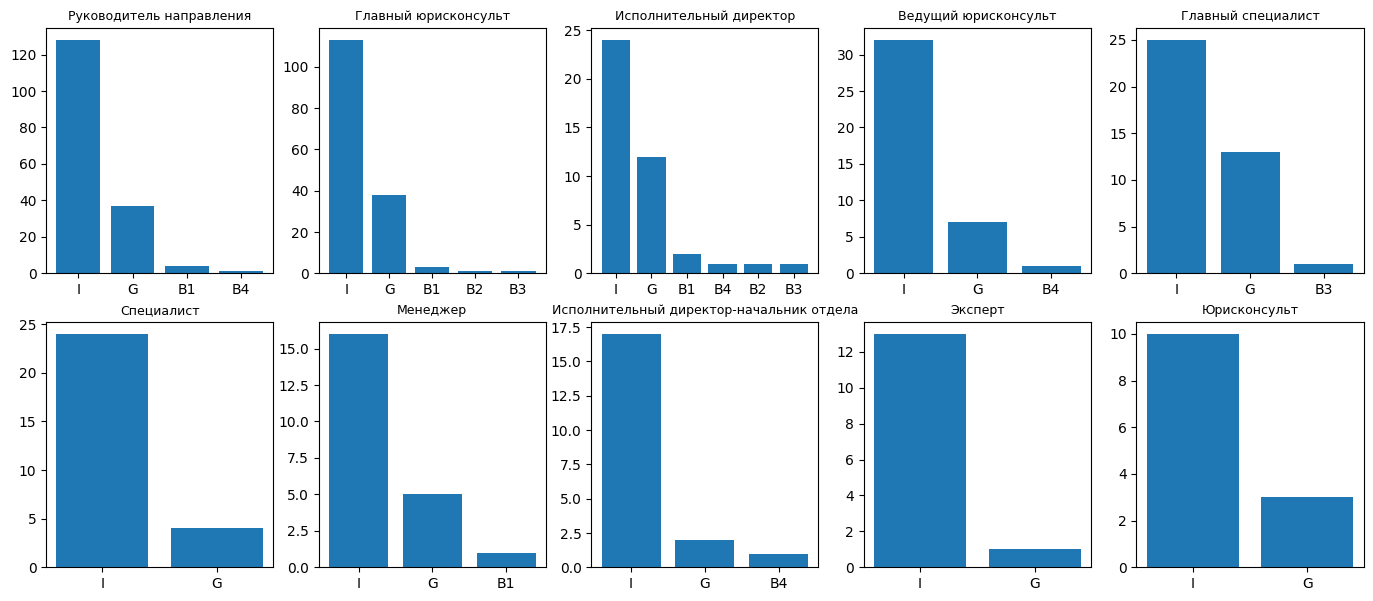

Блок Финансы


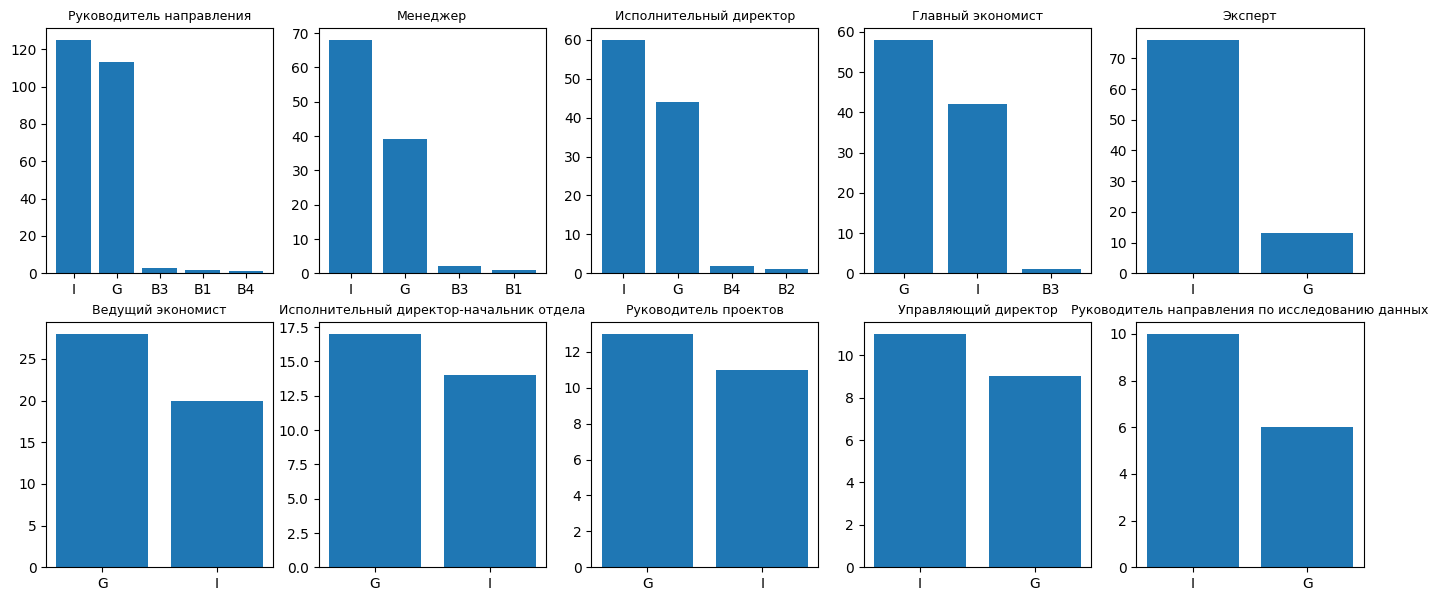

Блок Стратегия


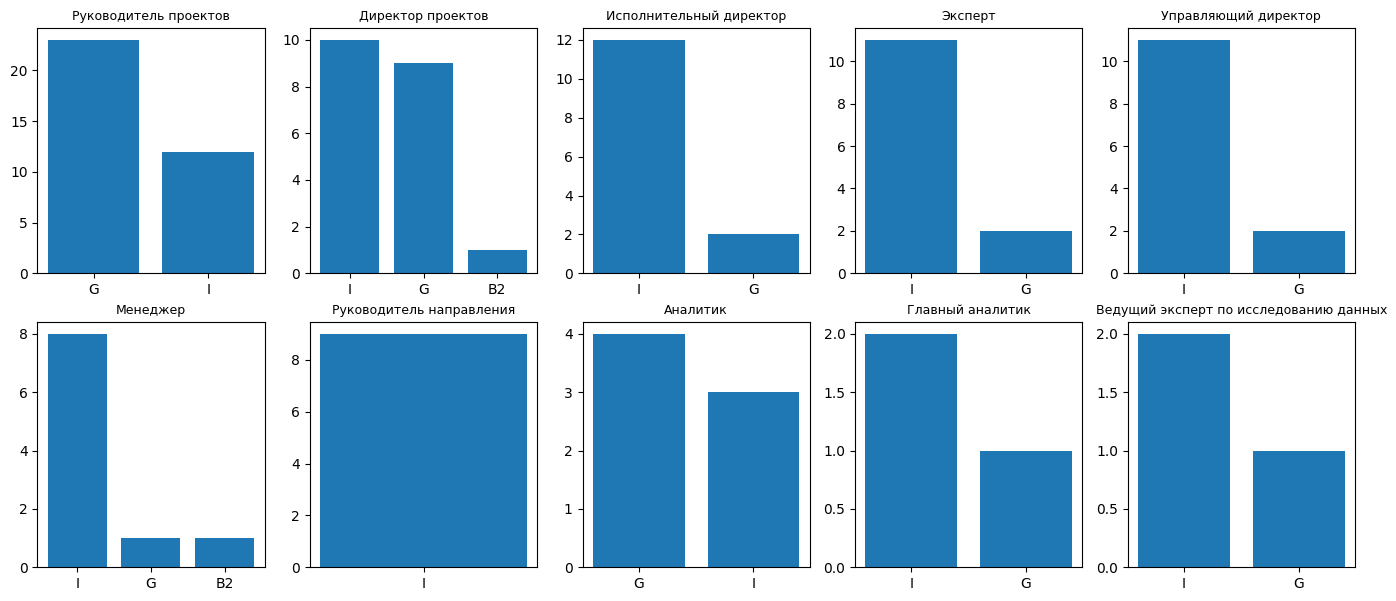

Блок Транзакционный


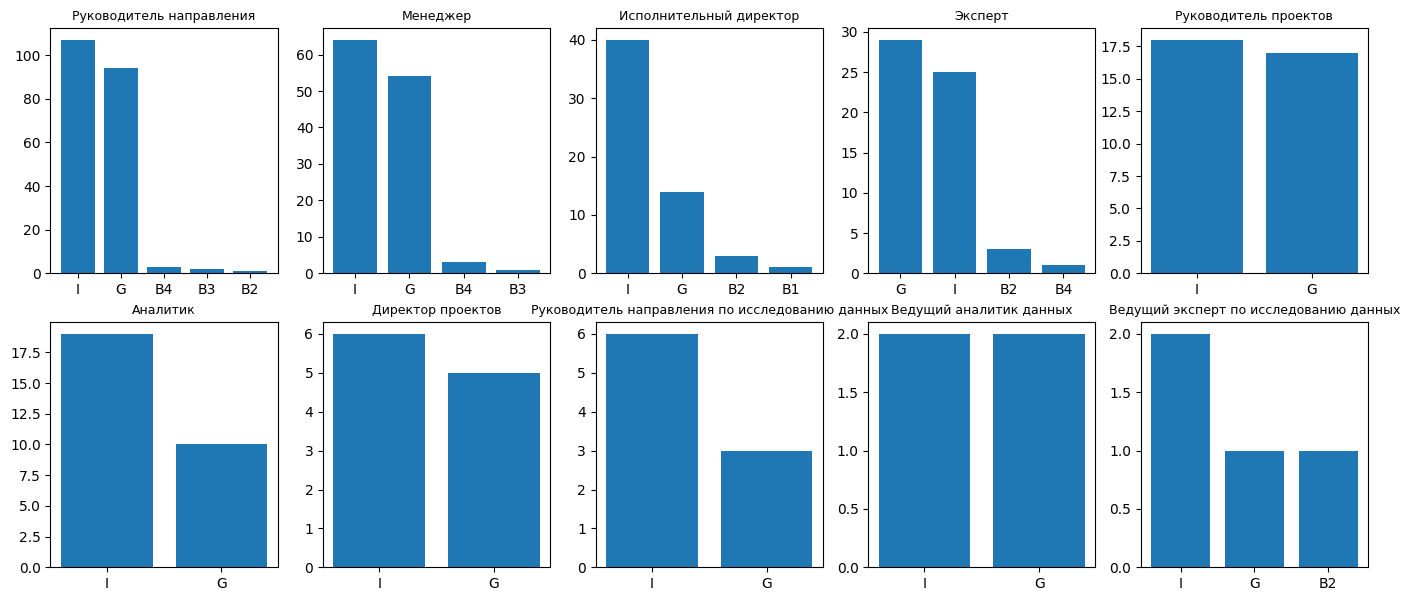

Блок Розничный


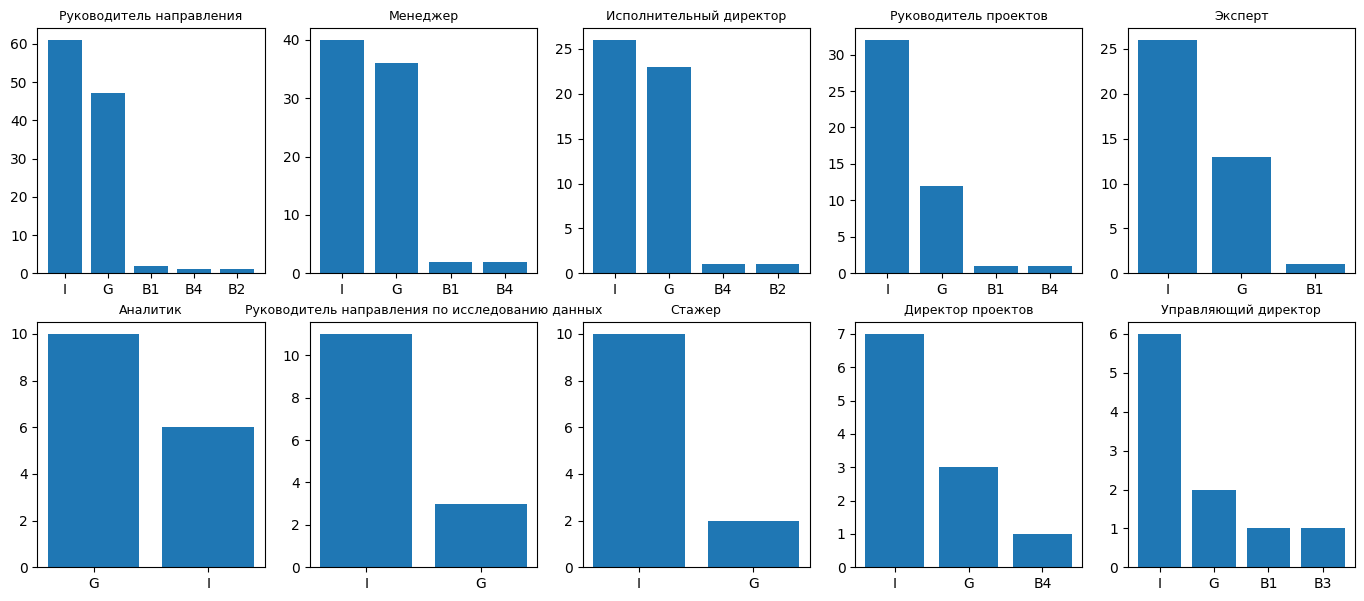

Блок Сеть


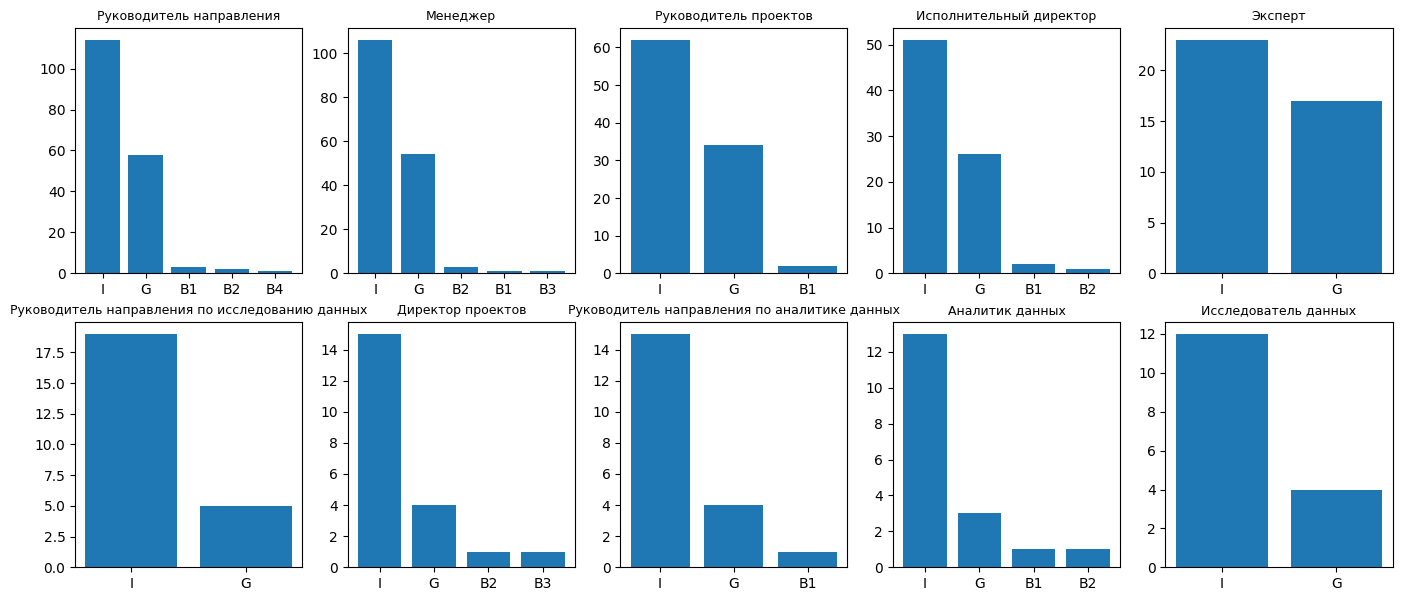

Блок Управление


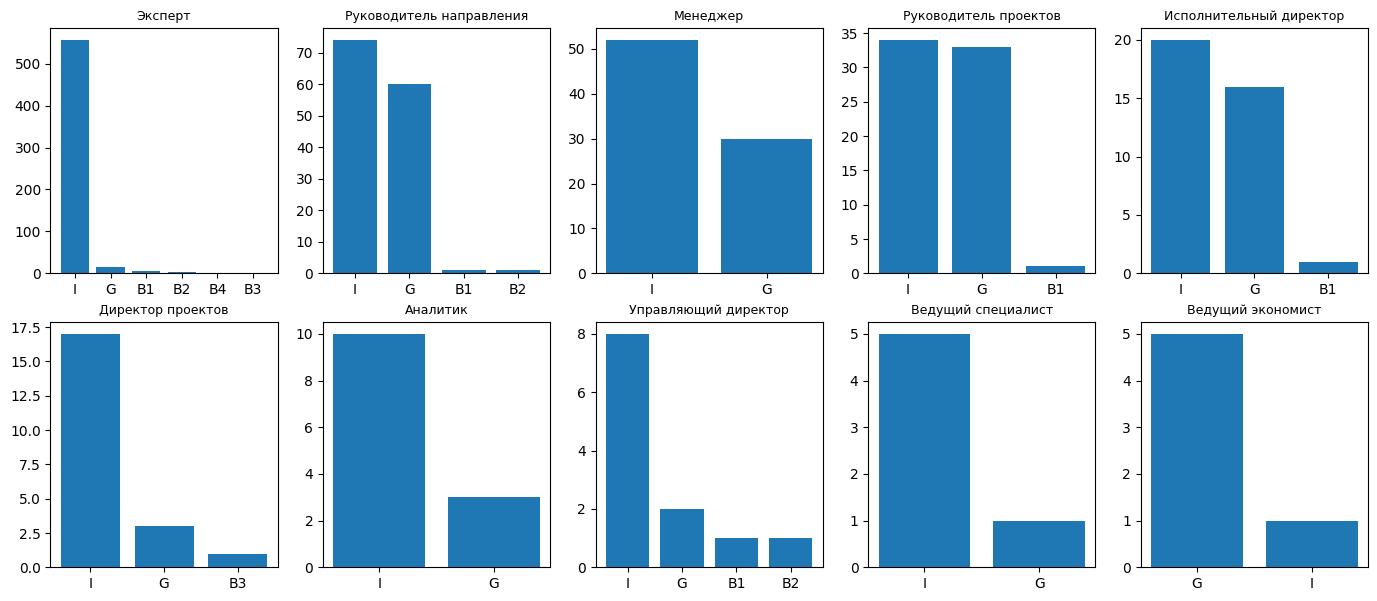

Другие подразделения


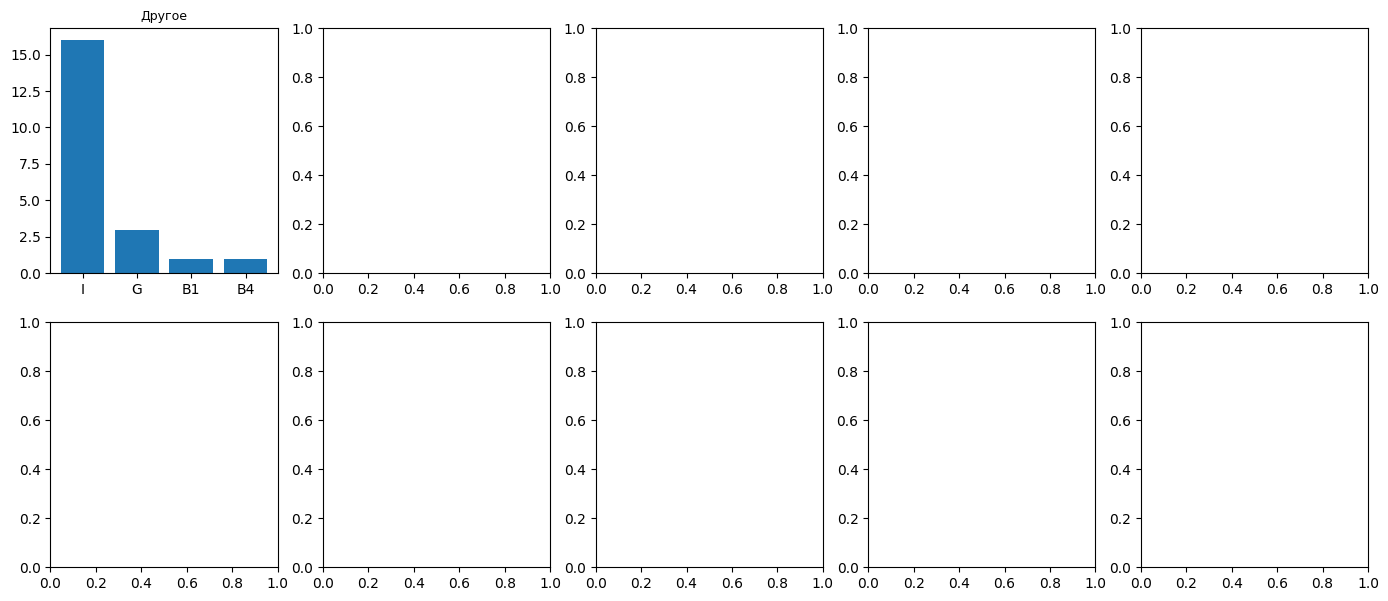

Блок Развитие


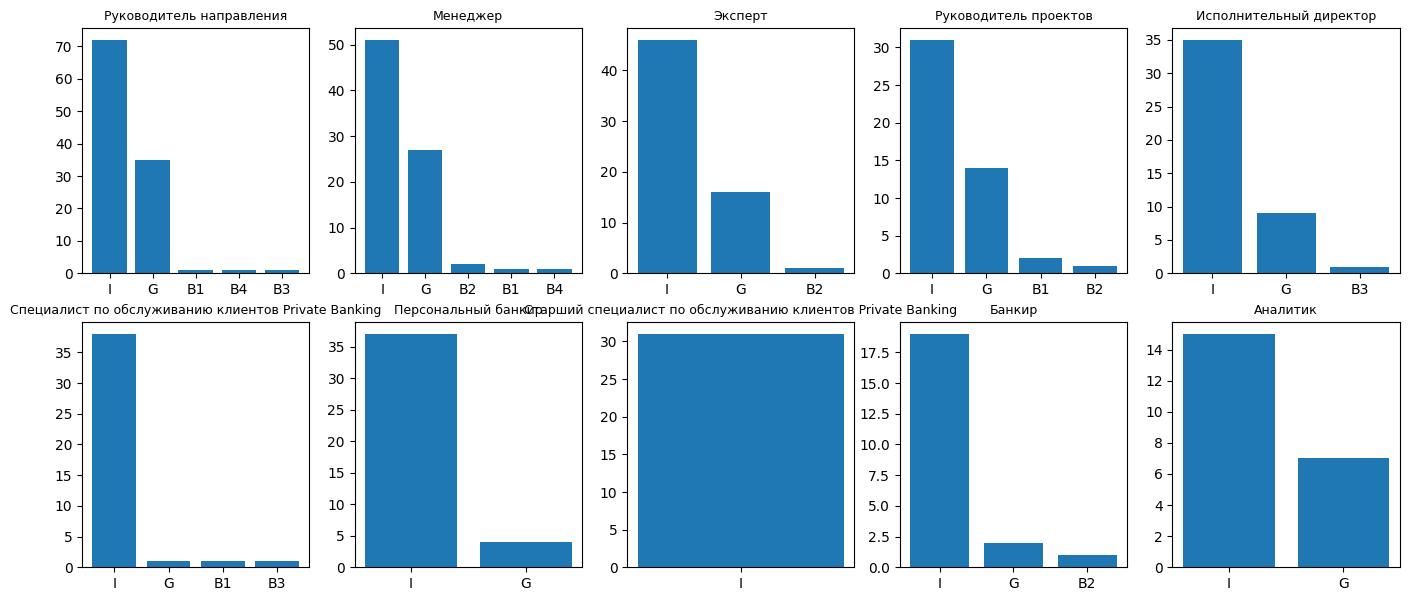

Блок Sberbank


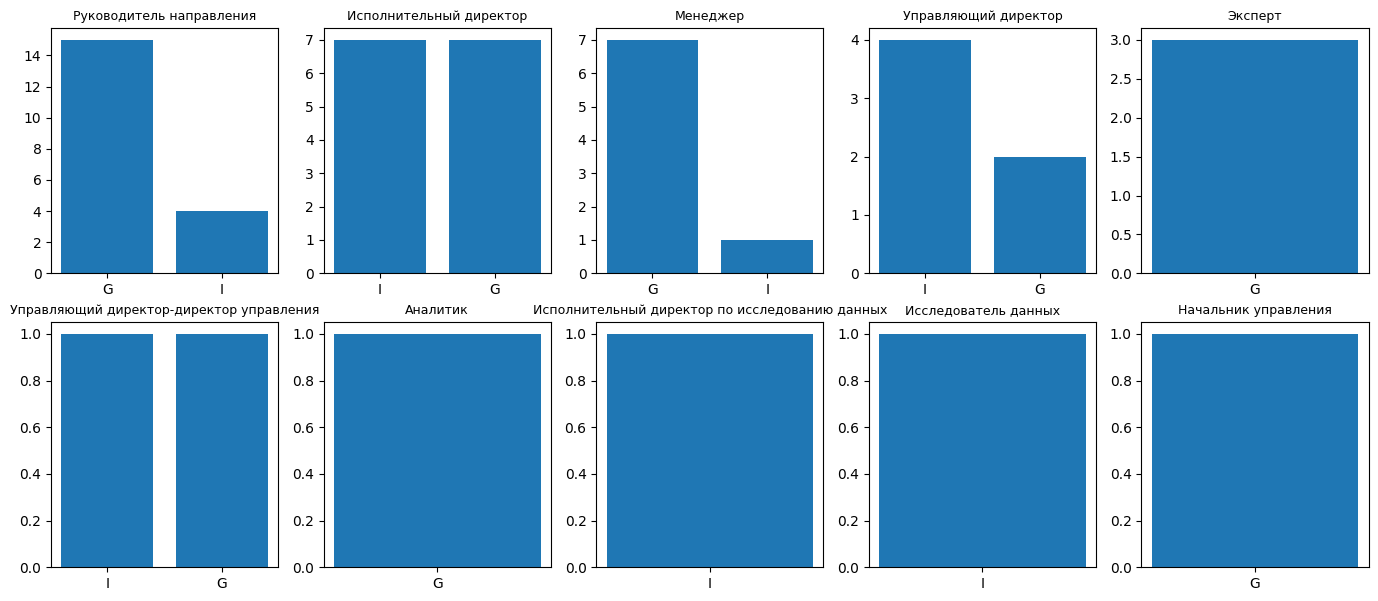

In [43]:
for department in table['Подразделение_3'].unique():
    department_stat(department)

# Подсчет без (0, 0, 0)

Выделение исходов без (0, 0, 0)

In [44]:
new_codes = [(0, 0, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]

Рассчет описания исходов по новому списку

In [45]:
new_possible_ends = {code: check_end(code) for code in new_codes}

Общее распределение исходов без учета (0, 0, 0)

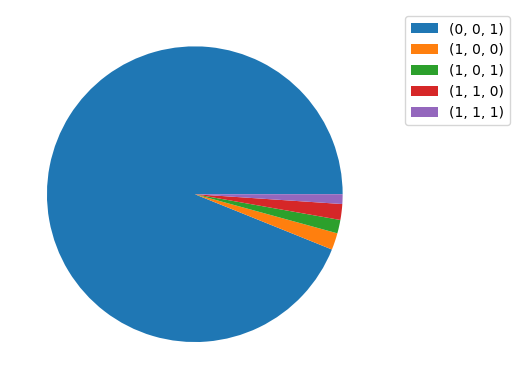

In [46]:
plt.pie([end.table_len for end in new_possible_ends.values()])

plt.legend(new_codes, bbox_to_anchor=( 1.05 , 1 ), loc='upper left')
plt.show()

Распределение исходов по топ 10 по популярности должностям без (0, 0, 0)

Руководитель направления


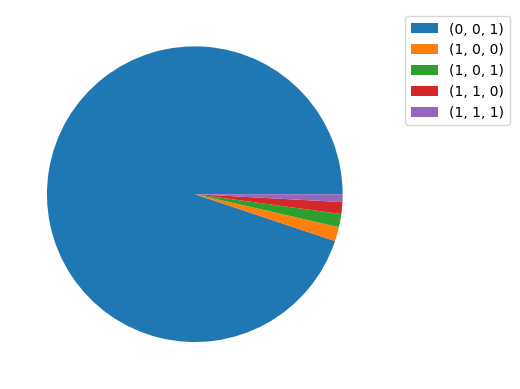

Главный инженер по разработке


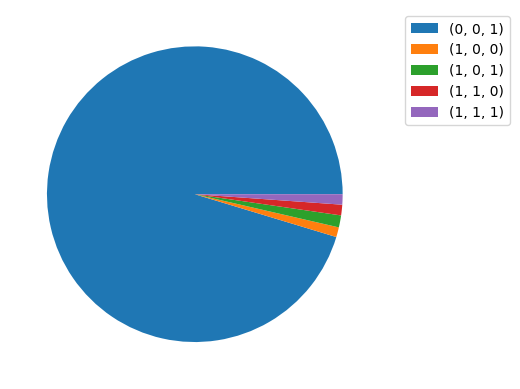

Ведущий инженер по разработке


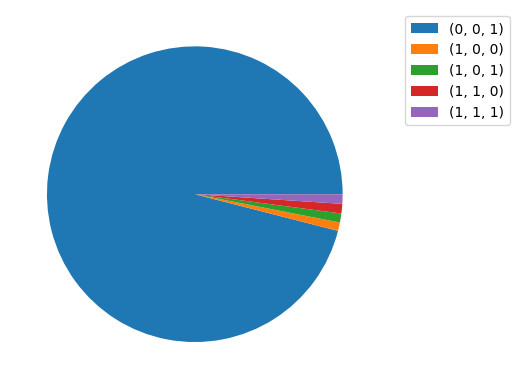

Эксперт


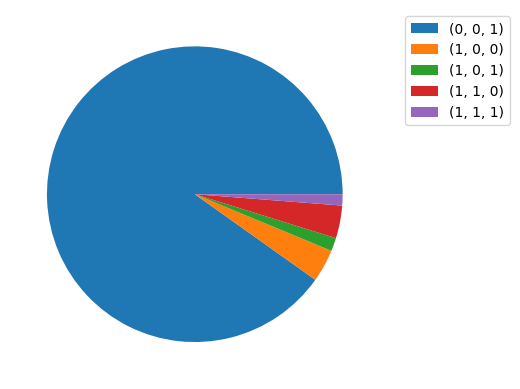

Менеджер


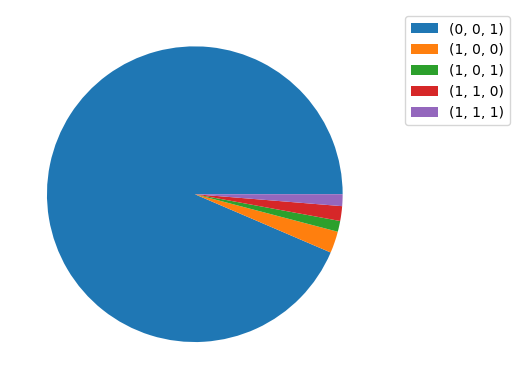

Исполнительный директор


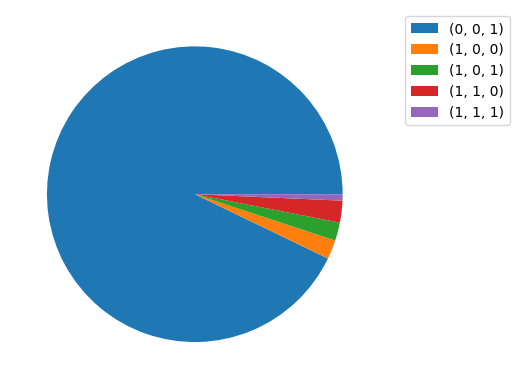

Старший инженер по разработке


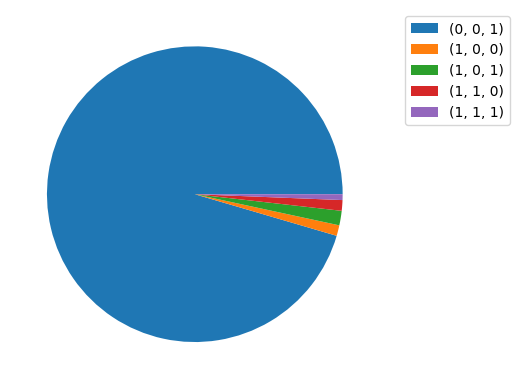

Руководитель проектов


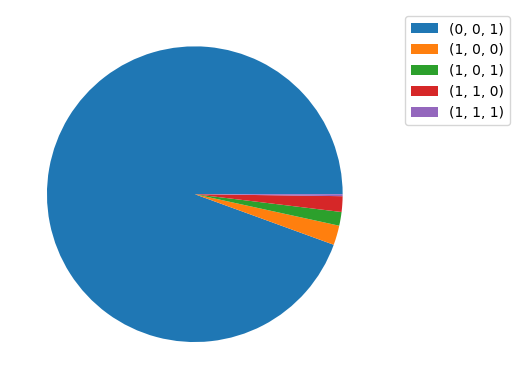

Ведущий инженер по сопровождению


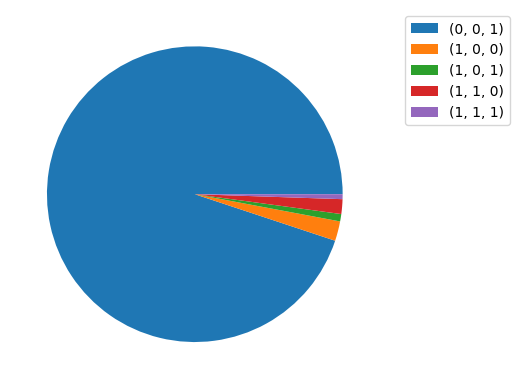

Ведущий инженер


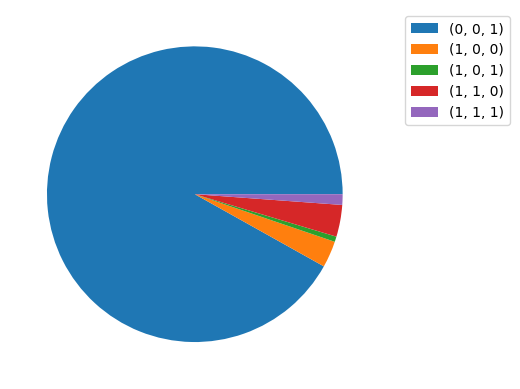

In [47]:
for worker in dict(top_workers).keys():
    print(worker)
    data_list = []
    for end in new_possible_ends.values():
        try:
            data_list.append(dict(end.worker_rate)[worker])
        except KeyError:
            pass
    plt.pie(data_list)
    plt.legend(new_codes, bbox_to_anchor=( 1.05 , 1 ), loc='upper left')
    plt.show()

Распределение исходов по блокам без (0, 0, 0)

Блок Технологии


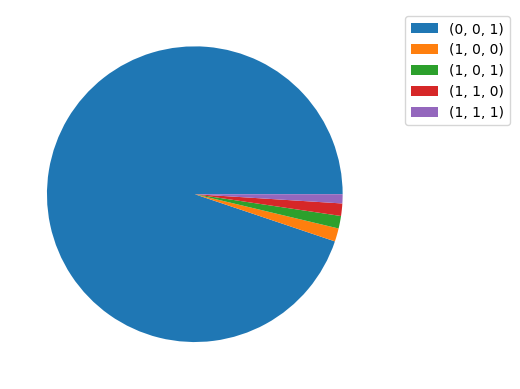

Блок Корпоративно-инвестиционный


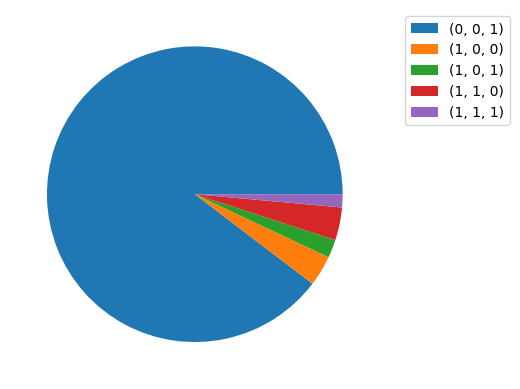

Подразделения вне


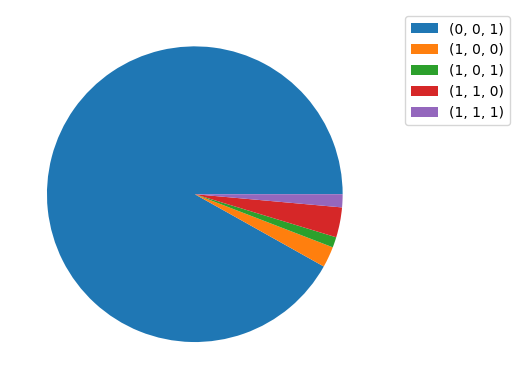

Блок Сервисы


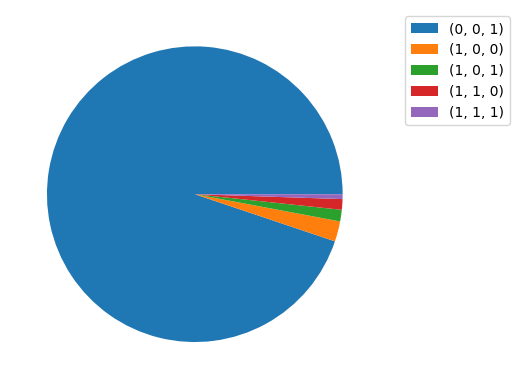

Блок Управление


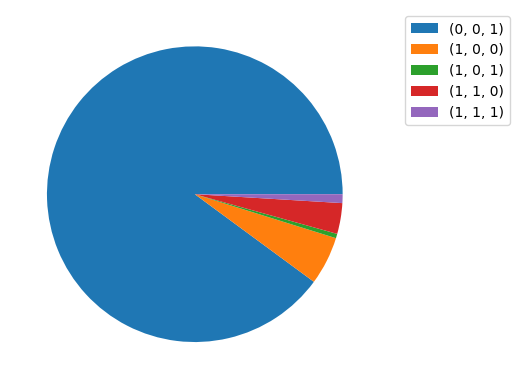

Блок HR


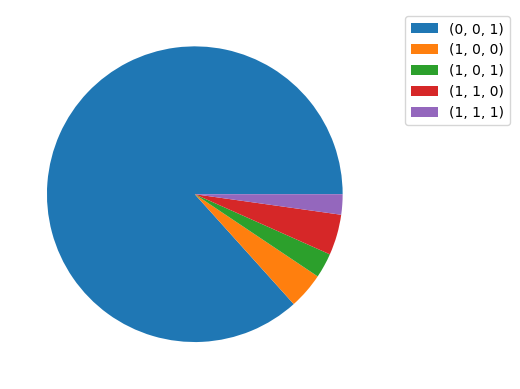

Блок Финансы


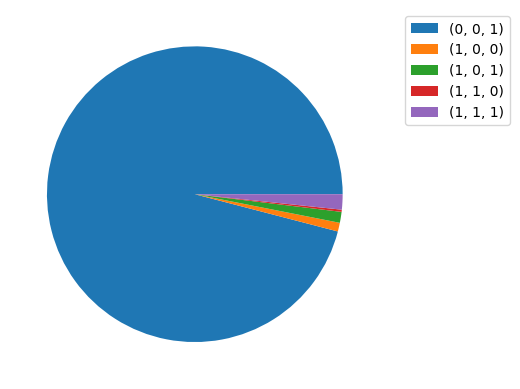

Блок Риски


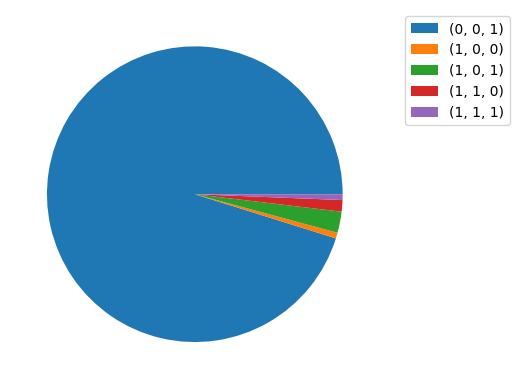

Блок Сеть


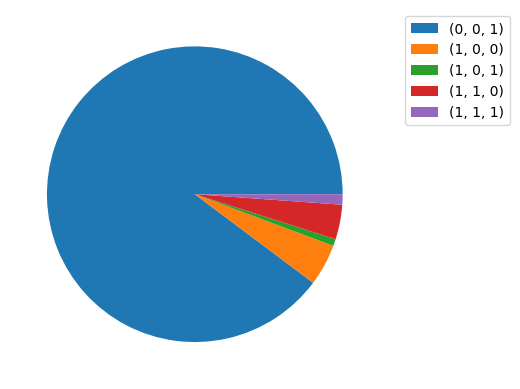

Прямое подчинение


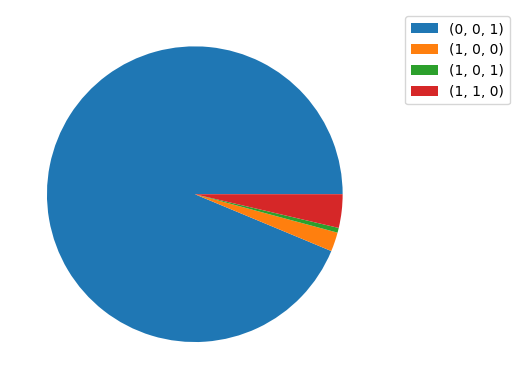

In [48]:
for department in dict(top_departments).keys():
    print(department)
    data_list = []
    for end in new_possible_ends.values():
        try:
            data_list.append(dict(end.department_rate)[department])
        except KeyError:
            pass
    plt.pie(data_list)
    plt.legend(new_codes, bbox_to_anchor=( 1.05 , 1 ), loc='upper left')
    plt.show()

# Подсчет вероятности наступления исхода

Подготовка таблицы

In [49]:
temp_table

,Должность,Подразделение_3,Исход
0,Ведущий инженер по сопровождению,Блок Технологии,"(1, 1, 0)"
1,Руководитель направления,Блок Технологии,"(0, 0, 1)"
2,Руководитель направления,Блок Риски,"(0, 0, 0)"
3,Исполнительный директор,Блок Технологии,"(0, 0, 0)"
4,Исполнительный директор,Блок Технологии,"(0, 0, 0)"
...,...,...,...
45654,Главный инженер по разработке,Блок Технологии,"(0, 0, 0)"
45656,Главный инженер по разработке,Блок Технологии,"(1, 1, 1)"
45657,Главный инженер по разработке,Блок Технологии,"(0, 0, 1)"
45658,Эксперт,Подразделения вне,"(1, 1, 0)"


In [50]:
temp_table['Исход'] = temp_table['Исход'].map(lambda cell: str(cell))

Функция для оценки вероятности наступления исхода

In [51]:
def get_probability_w(cur_end: tuple) -> dict:
    print(cur_end)
    cur_table = temp_table.query(f'Исход == "{str(cur_end)}"')
    gen_col = dict(table.value_counts('Должность'))
    cur_col = dict(cur_table.value_counts('Должность'))
    return {worker: f"{cur_col[worker]/gen_col[worker]:0.2f}" for worker in cur_col.keys()}

Оценка для топ-10 по популярности должностей

In [52]:
for end in possible_ends:
    cur_top = get_probability_w(end)
    for row in cur_top.items():
        print(f"Вероятность для {row[0]} - {row[1]}")

(0, 0, 0)
Вероятность для Руководитель направления - 0.53
Вероятность для Главный инженер по разработке - 0.49
Вероятность для Эксперт - 0.70
Вероятность для Ведущий инженер по разработке - 0.50
Вероятность для Менеджер - 0.62
Вероятность для Исполнительный директор - 0.59
Вероятность для Старший инженер по разработке - 0.48
Вероятность для Руководитель проектов - 0.60
Вероятность для Ведущий инженер по сопровождению - 0.64
Вероятность для Ведущий инженер - 0.64
(0, 0, 1)
Вероятность для Руководитель направления - 0.45
Вероятность для Главный инженер по разработке - 0.49
Вероятность для Ведущий инженер по разработке - 0.48
Вероятность для Исполнительный директор - 0.38
Вероятность для Старший инженер по разработке - 0.50
Вероятность для Менеджер - 0.35
Вероятность для Эксперт - 0.27
Вероятность для Руководитель проектов - 0.38
Вероятность для Ведущий инженер по сопровождению - 0.34
Вероятность для Ведущий инженер - 0.33
(1, 0, 0)
Вероятность для Руководитель направления - 0.01
Вероятно

In [53]:
def get_probability_w_full(cur_end: tuple) -> dict:
    print('\n')
    print('\n', cur_end, '\n', sep='')
    cur_table = full_temp_table.query(f'Исход == "{str(cur_end)}"')
    gen_col = dict(table.value_counts('Должность'))
    cur_col = dict(cur_table.value_counts('Должность'))
    return {worker: f"{cur_col[worker]/gen_col[worker]:0.2f}" for worker in cur_col.keys()}

Полная оценка для каждой должности

In [54]:
for end in possible_ends:
    cur_top = get_probability_w_full(end)
    cur_top = {key: float(val) for key, val in cur_top.items()}
    cur_top = dict(sorted(cur_top.items(), key=lambda item: item[1], reverse=True))
    try:
        print('\n', f'Средний показатель - {median(list(cur_top.values()))}', '\n', sep='')
        for row in cur_top.items():
            print(f"Вероятность для {row[0]} - {row[1]}")
    except StatisticsError:
        pass




(0, 0, 0)


Средний показатель - 0.79

Вероятность для Старший специалист по обслуживанию клиентов Private Banking - 1.0
Вероятность для Охранник (осуществляет охрану ценностей, боевого оружия (на посту)) - 1.0
Вероятность для Вице-президент-директор департамента - 1.0
Вероятность для Инженер-электрик - 1.0
Вероятность для Руководитель направления-старший финансовый контролер - 1.0
Вероятность для Уборщик - 1.0
Вероятность для Аджайл-коуч - 1.0
Вероятность для Старший охранник (1 категории) (осуществляет охрану ценностей, боевого оружия (на посту)) - 1.0
Вероятность для Менеджер по работе с ключевыми партнерами - 1.0
Вероятность для Отраслевой кредитный менеджер - 1.0
Вероятность для Старший сейлз - 1.0
Вероятность для Директор по финансовым институтам - 1.0
Вероятность для Директор-старший сейлз - 1.0
Вероятность для Начальник центра - 1.0
Вероятность для Ведущий специалист по продажам - 1.0
Вероятность для Директор по работе со специальными проектами - 1.0
Вероятность для Медиатор

Оценка наиболее уязвимых к фишингу должностей (от 5 и более человек в компании)

In [55]:
def check_worker(cur_end: tuple) -> list:
    gen_workers_col = table.value_counts('Должность')
    cur_workers_col = dict(possible_ends[cur_end].worker_rate)
    cur_workers_col = {key: val for key, val in cur_workers_col.items() if val >= 5}
    workers_col_diff = defaultdict(float)
    for worker in cur_workers_col:
        try:
            workers_col_diff[worker] = cur_workers_col[worker]/gen_workers_col[worker]
        except KeyError:
            pass
        
    return sorted(workers_col_diff.items(), key=lambda item: item[1], reverse=True)[:10]
        

In [56]:
bad_codes = [(1, 0, 0), (1, 1, 0), (1, 0, 1), (1, 1, 1)]

In [57]:
for code in bad_codes:
    print(code)
    cur_top = check_worker(code)
    for worker in cur_top:
        print(f"{worker[0]}: {worker[1]:0.2f}")
    print("\n")

(1, 0, 0)
Старший водитель автомобиля, предназначенного для перевозки ценностей и корреспонденции: 0.21
Управляющий директор: 0.03
Стажер-инженер: 0.03
Стажер: 0.02
Старший инженер: 0.01
Инженер по разработке: 0.01
Эксперт: 0.01
Ведущий инженер: 0.01
Аналитик: 0.01
Менеджер: 0.01


(1, 1, 0)
Стажер-инженер: 0.08
Стажер: 0.04
Управляющий директор: 0.02
Ведущий инженер: 0.01
Эксперт: 0.01
Исполнительный директор: 0.01
Аналитик: 0.01
Инженер по разработке: 0.01
Старший эксперт по технологиям: 0.01
Главный инженер: 0.01


(1, 0, 1)
Стажер-инженер: 0.03
Ведущий эксперт по технологиям: 0.02
Стажер: 0.02
Старший эксперт по технологиям: 0.01
Старший инженер по разработке: 0.01
Исполнительный директор: 0.01
Инженер по разработке: 0.01
Руководитель направления: 0.01
Главный инженер по разработке: 0.01
Руководитель проектов: 0.01


(1, 1, 1)
Стажер-инженер: 0.04
Стажер: 0.02
Инженер по разработке: 0.01
Главный инженер по разработке: 0.01
Ведущий инженер по разработке: 0.01
Менеджер: 0.00
Руководи

Рассмотрение хорошего исхода

In [58]:
print("(0, 0, 1)")
cur_top = check_worker((0, 0, 1))
for worker in cur_top:
    print(f"{worker[0]}: {worker[1]:0.2f}")

(0, 0, 1)
Руководитель направления по кибербезопасности: 0.83
Ведущий архитектор: 0.83
Старший руководитель проектов: 0.79
Инцидент-менеджер: 0.69
Исполнительный директор по валидации: 0.62
Ведущий экономист: 0.61
Главный экономист: 0.57
Ведущий аналитик: 0.55
Главный специалист: 0.54
Категорийный менеджер: 0.54


Рассмотрение варианта с игнорированием

In [59]:
print("(0, 0, 0)")
cur_top = check_worker((0, 0, 0))
for worker in cur_top:
    print(f"{worker[0]}: {worker[1]:0.2f}")

(0, 0, 0)
Старший специалист по обслуживанию клиентов Private Banking: 1.00
Охранник (осуществляет охрану ценностей, боевого оружия (на посту)): 1.00
Вице-президент-директор департамента: 1.00
Инженер-электрик: 1.00
Руководитель направления-старший финансовый контролер: 1.00
Уборщик: 1.00
Аджайл-коуч: 1.00
Старший охранник (1 категории) (осуществляет охрану ценностей, боевого оружия (на посту)): 1.00
Менеджер по работе с ключевыми партнерами: 1.00
Отраслевой кредитный менеджер: 1.00


Оценка наиболее уязвимых к фишингу блоков

In [60]:
def check_department(cur_end: tuple) -> list:
    gen_dep_col = table.value_counts('Подразделение_3')
    cur_dep_col = dict(possible_ends[cur_end].department_rate)
    dep_col_diff = defaultdict(float)
    for department in cur_dep_col:
        try:
            dep_col_diff[department] = cur_dep_col[department]/gen_dep_col[department]
        except KeyError:
            pass
        
    return sorted(dep_col_diff.items(), key=lambda item: item[1], reverse=True)

In [61]:
for code in bad_codes:
    print(code)
    cur_top = check_department(code)
    for department in cur_top:
        print(f"{department[0]}: {department[1]:0.2f}")
    print("\n")

(1, 0, 0)
Другие подразделения: 0.05
Блок GR,: 0.02
Блок Розничный: 0.02
Блок HR: 0.02
Блок Сеть: 0.02
Блок Корпоративно-инвестиционный: 0.01
Блок Управление: 0.01
Блок Сервисы: 0.01
Блок Развитие: 0.01
Блок Технологии: 0.01
Подразделения вне: 0.01
Прямое подчинение: 0.01
Блок Финансы: 0.00
Блок Транзакционный: 0.00
Блок Риски: 0.00


(1, 1, 0)
Блок Стратегия: 0.02
Блок HR: 0.02
Блок Транзакционный: 0.01
Блок Сеть: 0.01
Блок Корпоративно-инвестиционный: 0.01
Прямое подчинение: 0.01
Подразделения вне: 0.01
Блок Развитие: 0.01
Блок Риски: 0.01
Блок Управление: 0.01
Блок Технологии: 0.01
Блок GR,: 0.01
Блок Сервисы: 0.01
Блок Розничный: 0.00
Блок Финансы: 0.00


(1, 0, 1)
Другие подразделения: 0.05
Блок Транзакционный: 0.01
Блок Розничный: 0.01
Блок Риски: 0.01
Блок HR: 0.01
Блок GR,: 0.01
Блок Корпоративно-инвестиционный: 0.01
Блок Технологии: 0.01
Блок Сервисы: 0.01
Блок Финансы: 0.01
Блок Развитие: 0.00
Подразделения вне: 0.00
Блок Сеть: 0.00
Прямое подчинение: 0.00
Блок Управление: 0.

Рассмотрение хорошего исхода

In [62]:
print("(0, 0, 1)")
cur_top = check_department((0, 0, 1))
for department in cur_top:
    print(f"{department[0]}: {department[1]:0.2f}")

(0, 0, 1)
Блок Sberbank: 0.64
Блок Риски: 0.53
Блок Технологии: 0.44
Блок Финансы: 0.44
Блок Сервисы: 0.43
Блок Транзакционный: 0.42
Блок Розничный: 0.38
Блок HR: 0.36
Блок Стратегия: 0.35
Блок Сеть: 0.31
Блок Корпоративно-инвестиционный: 0.30
Подразделения вне: 0.27
Прямое подчинение: 0.26
Блок GR,: 0.22
Блок Развитие: 0.22
Блок Управление: 0.19
Другие подразделения: 0.14


Рассмотрение варианта с игнорированием

In [63]:
print("(0, 0, 0)")
cur_top = check_department((0, 0, 0))
for department in cur_top:
    print(f"{department[0]}: {department[1]:0.2f}")

(0, 0, 0)
Блок Управление: 0.79
Другие подразделения: 0.76
Блок Развитие: 0.75
Блок GR,: 0.73
Прямое подчинение: 0.72
Подразделения вне: 0.71
Блок Корпоративно-инвестиционный: 0.67
Блок Сеть: 0.65
Блок Стратегия: 0.63
Блок HR: 0.59
Блок Розничный: 0.58
Блок Сервисы: 0.55
Блок Финансы: 0.54
Блок Транзакционный: 0.54
Блок Технологии: 0.54
Блок Риски: 0.44
Блок Sberbank: 0.34


Распределим сотрудников по группам. 1 группа - очень подвержены (x>0.75), 2 группа - скорее да, чем нет (0.5<x<0.75), 3 группа - скорее нет, чем да (0.25<x<0.5), 4 группа - наименее подвержены (x<0.25)

h - 1 группа
hm - 2 группа
ml - 3 группа
l - 4 группа

In [64]:
change_group = {'h': 'hm', 'hm': 'ml', 'ml': 'l'}
group_name = {'hm': 'Скорее да, чем нет', 'ml': 'Скорее нет, чем да','l': 'Наименее подвержены'}

In [65]:
for end in possible_ends:
    cur_top = get_probability_w_full(end)
    cur_group = 'h'
    next_group_chk = 0.75
    print('Наиболее подвержены\n')
    for row in cur_top.items():
        if float(row[1]) < next_group_chk:
            cur_group = change_group[cur_group]
            next_group_chk -= 0.25
            print('\n')
            print('\n', group_name[cur_group], '\n', sep='')
        print(row[0], end='; ')




(0, 0, 0)

Наиболее подвержены




Скорее да, чем нет

Руководитель направления; 


Скорее нет, чем да

Главный инженер по разработке; Эксперт; Ведущий инженер по разработке; Менеджер; Исполнительный директор; Старший инженер по разработке; Руководитель проектов; Ведущий инженер по сопровождению; Ведущий инженер; Главный инженер; Аналитик; Старший инженер; Инженер по разработке; Старший инженер по сопровождению; Главный инженер по сопровождению; Старший эксперт по технологиям; Директор проектов; Ведущий эксперт по технологиям; Руководитель направления по исследованию данных; Управляющий директор; Стажер; Ведущий эксперт; Главный эксперт; Исполнительный директор-начальник отдела; Ведущий аналитик; Главный юрисконсульт; Главный аналитик; Инженер по сопровождению; Ведущий инспектор; Старший аналитик; Главный специалист; Инженер; Старший эксперт; Управляющий директор-начальник управления; Руководитель направления по аналитике данных; Ведущий специалист; Стажер-инженер; Исполнительный ди

Разделение на управляющий и рядовой состав

In [66]:
key_words = {'руководитель', 'директор', 'ведущий', 'главный', 'президент', 'начальник', 'советник'}
lead_workers = []

In [67]:
for worker in list(table['Должность'].unique()):
    cl_worker = "".join([ltr.lower() if ltr not in ['-', '.', ','] else ' ' for ltr in worker])
    if set(cl_worker.split()).intersection(key_words):
        lead_workers.append(worker)

In [68]:
len(lead_workers)

228

In [69]:
lead_workers_table = full_temp_table.loc[full_temp_table['Должность'].isin(lead_workers)]

In [70]:
lead_workers_df = pd.DataFrame(lead_workers_table.value_counts('Исход').items(), columns=['Исход', 'Вероятность'])

In [71]:
lead_workers_df['Вероятность'] = lead_workers_df['Вероятность'].map(lambda cell: int(cell)/sum(list(lead_workers_df['Вероятность'])))

In [72]:
lead_workers_df['Вероятность'] = lead_workers_df['Вероятность'].map(lambda cell: float(f'{cell:0.3f}'))

In [73]:
lead_workers_df

,Исход,Вероятность
0,"(0, 0, 0)",0.549
1,"(0, 0, 1)",0.426
2,"(1, 0, 0)",0.007
3,"(1, 1, 0)",0.006
4,"(1, 0, 1)",0.006
5,"(1, 1, 1)",0.005


In [74]:
simple_workers = set(table['Должность'].unique()).difference(set(lead_workers))

In [75]:
len(simple_workers)

155

In [76]:
simple_workers_table = full_temp_table.loc[full_temp_table['Должность'].isin(simple_workers)]

In [77]:
simple_workers_df = pd.DataFrame(simple_workers_table.value_counts('Исход').items(), columns=['Исход', 'Вероятность'])

In [78]:
simple_workers_df['Вероятность'] = simple_workers_df['Вероятность'].map(lambda cell: int(cell)/sum(list(simple_workers_df['Вероятность'])))

In [79]:
simple_workers_df['Вероятность'] = simple_workers_df['Вероятность'].map(lambda cell: float(f'{cell:0.3f}'))

In [80]:
simple_workers_df

,Исход,Вероятность
0,"(0, 0, 0)",0.634
1,"(0, 0, 1)",0.336
2,"(1, 1, 0)",0.010
3,"(1, 0, 0)",0.009
4,"(1, 0, 1)",0.006
5,"(1, 1, 1)",0.005


Подсчет вероятностей каждого исхода для управляющего и рядового состава

In [81]:
def check_lead_worker(cur_end: tuple) -> list:
    gen_workers_col = table.value_counts('Должность')
    cur_workers_col = dict(possible_ends[cur_end].worker_rate)
    workers_col_diff = defaultdict(float)
    for worker in cur_workers_col:
        try:
            workers_col_diff[worker] = cur_workers_col[worker]/gen_workers_col[worker]
        except KeyError:
            pass
        
    workers_col_diff = list(map(lambda item: item if item[0] in lead_workers else "-", workers_col_diff.items()))
    workers_col_diff = [item for item in workers_col_diff if item != '-']
    workers_col_diff = {item[0]: item[1] for item in workers_col_diff}
    
    return sorted(workers_col_diff.items(), key=lambda item: item[1], reverse=True)

Рассчет вероятности для руководящего состава

In [82]:
for end in possible_ends:
    cur_top = check_lead_worker(end)
    cur_top = {item[0]: float(item[1]) for item in cur_top}
    print('\n', end, '\n', sep='')
    try:
        print('\n', f'Средний показатель - {median(list(cur_top.values())):0.2f}', '\n', sep='')
        for row in cur_top.items():
            print(f"Вероятность для {row[0]} - {row[1]:0.2f}")
    except StatisticsError:
        pass


(0, 0, 0)


Средний показатель - 0.75

Вероятность для Вице-президент-директор департамента - 1.00
Вероятность для Руководитель направления-старший финансовый контролер - 1.00
Вероятность для Директор по финансовым институтам - 1.00
Вероятность для Директор-старший сейлз - 1.00
Вероятность для Начальник центра - 1.00
Вероятность для Ведущий специалист по продажам - 1.00
Вероятность для Директор по работе со специальными проектами - 1.00
Вероятность для Исполнительный директор-директор центра - 1.00
Вероятность для Исполнительный директор-руководитель дирекции - 1.00
Вероятность для Исполнительный директор-старший сейлз - 1.00
Вероятность для Главный инженер ЦОД - 1.00
Вероятность для Главный специалист по продажам - 1.00
Вероятность для Главный специалист КИПиА - 1.00
Вероятность для Главный механик - 1.00
Вероятность для Управляющий директор по исследованию данных-начальник отдела - 1.00
Вероятность для Ведущий трейдер - 1.00
Вероятность для Ведущий инженер КИПиА - 1.00
Вероятность д

In [83]:
def check_simple_worker(cur_end: tuple) -> list:
    gen_workers_col = table.value_counts('Должность')
    cur_workers_col = dict(possible_ends[cur_end].worker_rate)
    workers_col_diff = defaultdict(float)
    for worker in cur_workers_col:
        try:
            workers_col_diff[worker] = cur_workers_col[worker]/gen_workers_col[worker]
        except KeyError:
            pass
        
    workers_col_diff = list(map(lambda item: item if item[0] in simple_workers else "-", workers_col_diff.items()))
    workers_col_diff = [item for item in workers_col_diff if item != '-']
    workers_col_diff = {item[0]: item[1] for item in workers_col_diff}
    
    return sorted(workers_col_diff.items(), key=lambda item: item[1], reverse=True)

Рассчет вероятности для рядового состава

In [84]:
for end in possible_ends:
    cur_top = check_simple_worker(end)
    cur_top = {item[0]: float(item[1]) for item in cur_top}
    print('\n', end, '\n', sep='')
    try:
        print('\n', f'Средний показатель - {median(list(cur_top.values())):0.2f}', '\n', sep='')
        for row in cur_top.items():
            print(f"Вероятность для {row[0]} - {row[1]:0.2f}")
    except StatisticsError:
        pass


(0, 0, 0)


Средний показатель - 0.80

Вероятность для Старший специалист по обслуживанию клиентов Private Banking - 1.00
Вероятность для Охранник (осуществляет охрану ценностей, боевого оружия (на посту)) - 1.00
Вероятность для Инженер-электрик - 1.00
Вероятность для Уборщик - 1.00
Вероятность для Аджайл-коуч - 1.00
Вероятность для Старший охранник (1 категории) (осуществляет охрану ценностей, боевого оружия (на посту)) - 1.00
Вероятность для Менеджер по работе с ключевыми партнерами - 1.00
Вероятность для Отраслевой кредитный менеджер - 1.00
Вероятность для Старший сейлз - 1.00
Вероятность для Медиатор - 1.00
Вероятность для Менеджер по сопровождению ключевых клиентов - 1.00
Вероятность для Оператор-стенографист - 1.00
Вероятность для Аудитор-младший исследователь данных - 1.00
Вероятность для Старший охранник (1 категории) (осуществляет охрану ценностей, боевого оружия и корреспонденции при перевозке) - 1.00
Вероятность для Секретарь Исполнительного вице-президента, руководителя бл

Построение вероятностного распределения для всех исходов

По оси X - всевозможные исходы при взаимодействии с письмом. (0, 0, 0); (0, 0, 1) и тд. По оси Y - вероятность для каждого исхода.

In [85]:
full_temp_table

,Должность,Подразделение_3,Исход
0,Ведущий инженер по сопровождению,Блок Технологии,"(1, 1, 0)"
1,Руководитель направления,Блок Технологии,"(0, 0, 1)"
2,Руководитель направления,Блок Риски,"(0, 0, 0)"
3,Исполнительный директор,Блок Технологии,"(0, 0, 0)"
4,Исполнительный директор,Блок Технологии,"(0, 0, 0)"
...,...,...,...
45661,Аналитик,Блок Сервисы,"(1, 1, 0)"
45662,Ведущий эксперт по исследованию данных,Блок Корпоративно-инвестиционный,"(0, 0, 0)"
45663,Главный аналитик,Блок Корпоративно-инвестиционный,"(0, 0, 0)"
45664,Аналитик,Подразделения вне,"(0, 0, 0)"


In [86]:
prob_df = pd.DataFrame(full_temp_table.value_counts('Исход').items(), columns=['Исход', 'Вероятность'])

In [87]:
prob_df

,Исход,Вероятность
0,"(0, 0, 0)",26247
1,"(0, 0, 1)",18234
2,"(1, 0, 0)",357
3,"(1, 1, 0)",336
4,"(1, 0, 1)",286
5,"(1, 1, 1)",206


In [88]:
prob_df['Вероятность'] = prob_df['Вероятность'].map(lambda cell: int(cell)/sum(list(prob_df['Вероятность'])))

In [89]:
prob_df['Вероятность'] = prob_df['Вероятность'].map(lambda cell: float(f'{cell:0.3f}'))

In [90]:
prob_df

,Исход,Вероятность
0,"(0, 0, 0)",0.575
1,"(0, 0, 1)",0.399
2,"(1, 0, 0)",0.008
3,"(1, 1, 0)",0.007
4,"(1, 0, 1)",0.006
5,"(1, 1, 1)",0.005


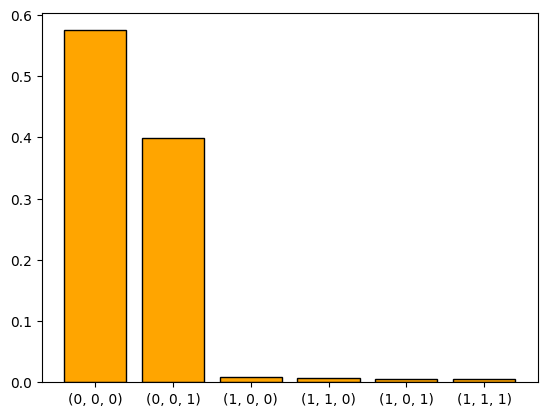

In [91]:
plt.bar(prob_df['Исход'], prob_df['Вероятность'], color = 'orange', edgecolor = 'black')

plt.show()